In [ ]:
# MODELISATION

# NB:

#### Étant donné que la série temporelle contient des dates manquantes (par exemple, on peut passer du 10 janvier 2012 au 13 janvier 2012 sans passer par les 11 et 12 janvier 2012), cela peut engendrer des problèmes dans l'analyse et la modélisation de notre série temporelle. Nous avons donc décidé d'ajouter ces dates manquantes dans notre jeu de données et de les imputer avec des valeurs non nulles pour leurs prix correspondants. Cependant, nous avons rencontré des difficultés pour effectuer cette modification en R en raison d'un problème de lecture des dates. Sans hésitation, Nous avons décidé de passer à Python, qui est plus flexible et nous a  finalement permis de préparer les données finales avec lesquelles nous allons travailler.s.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("BrentOilPrices.csv")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import pandas
           ^


In [10]:


# Convertir la colonne Date en format de date
#data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Afficher les premières lignes du dataframe pour vérifier le résultat
#data.head()


In [11]:
# Créer une nouvelle colonne "Date1" avec une séquence de dates commençant à "1987-05-20"
#start_date = pd.to_datetime("1987-05-20")
#end_date = start_date + pd.to_timedelta(len(data['Price']) - 1, unit='D')
#data['Date1'] = pd.date_range(start=start_date, end=end_date)

# Afficher les premières lignes du dataframe pour vérifier le résultat
#data.head()

In [12]:
# Créer une nouvelle colonne "Price1" avec des valeurs par défaut NaN
##data['Price1'] = np.nan

# Vérifier si chaque date de "Date1" existe dans "Date" et remplir "Price1" en conséquence
#for i in range(len(data)):
   # if data.loc[i, 'Date1'] in data['Date'].values:
     ###   price_index = data[data['Date'] == data.loc[i, 'Date1']].index[0]
     ##   data.loc[i, 'Price1'] = data.loc[price_index, 'Price']

# Afficher les premières lignes du dataframe pour vérifier le résultat
#data.head(22)

In [13]:
# Utiliser forward fill pour remplir les valeurs NaN dans "Price1"
#data['Price1'].ffill(inplace=True)

# Afficher les premières lignes du dataframe pour vérifier le résultat
#data.head(22)

## I -Import de données et exploration graphique des données

Nous sommes intéressés par les données décrivant les prix quotidiens du pétrole Brent. Il s'agit d'une série d'observations de fréquence par jour du 20/05/2012 au 19/01/2012.

In [10]:
# Lire les données depuis le fichier CSV
data <- read.csv("BrentOilPrices_modified.csv")
data <- subset(data, select = c("Date1", "Price1"))
# Afficher les premières lignes pour vérifier si les données sont correctement chargées
data




Date1,Price1
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,18.55
1987-05-24,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58


In [2]:
# Créer une série temporelle à partir des données Date1 et Price1
time_series <- ts(data$Price1, start = c(1987, 5, 20), frequency = 365)

# Afficher la série temporelle
print(time_series)


Time Series:
Start = c(1987, 5) 
End = c(2011, 255) 
Frequency = 365 
   [1]  18.63  18.45  18.55  18.55  18.55  18.60  18.63  18.60  18.60  18.58
  [11]  18.58  18.58  18.65  18.68  18.75  18.78  18.65  18.65  18.65  18.75
  [21]  18.78  18.78  18.68  18.78  18.78  18.78  18.78  18.90  19.03  19.05
  [31]  19.05  19.05  19.05  19.10  18.90  18.75  18.70  19.08  19.08  19.08
  [41]  19.15  19.08  18.98  19.25  19.33  19.33  19.33  19.48  19.50  19.48
  [51]  19.68  19.73  19.73  19.73  19.83  19.88  20.28  20.40  20.63  20.63
  [61]  20.63  20.55  20.35  20.33  20.15  19.58  19.58  19.58  19.30  19.78
  [71]  19.98  20.20  20.03  20.03  20.03  20.95  20.65  19.80  19.75  19.65
  [81]  19.65  19.65  19.43  19.45  19.50  19.40  19.25  19.25  19.25  18.85
  [91]  18.75  18.50  18.30  18.10  18.10  18.10  17.48  17.55  18.10  18.28
 [101]  18.20  18.20  18.20  18.63  18.43  18.40  18.18  18.13  18.13  18.13
 [111]  17.60  17.68  17.90  18.30  18.18  18.18  18.18  18.15  18.53  18.53
 [121]

In [3]:
length_date <- length(data$Date1)
print(length_date)

# Afficher la longueur de la colonne "Price1"
length_price <- length(data$Price1)
print(length_price)

[1] 9011
[1] 9011


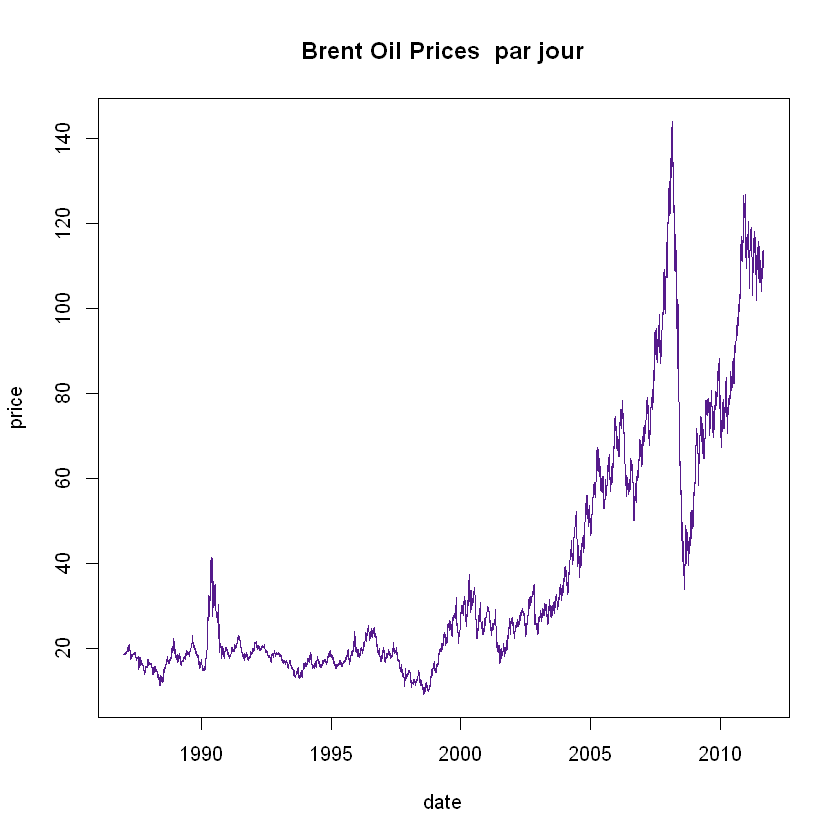

In [4]:
plot(time_series, xlab="date", ylab="price",
     main="Brent Oil Prices  par jour",
     col="purple4")

A travers la représentation graphique des données à étudier, on remarque la présence d'une tendance et d'une saisonnalité.Pour être sûr de ce qui a été observé, la fonction d'autocorrélation acf est examinée.

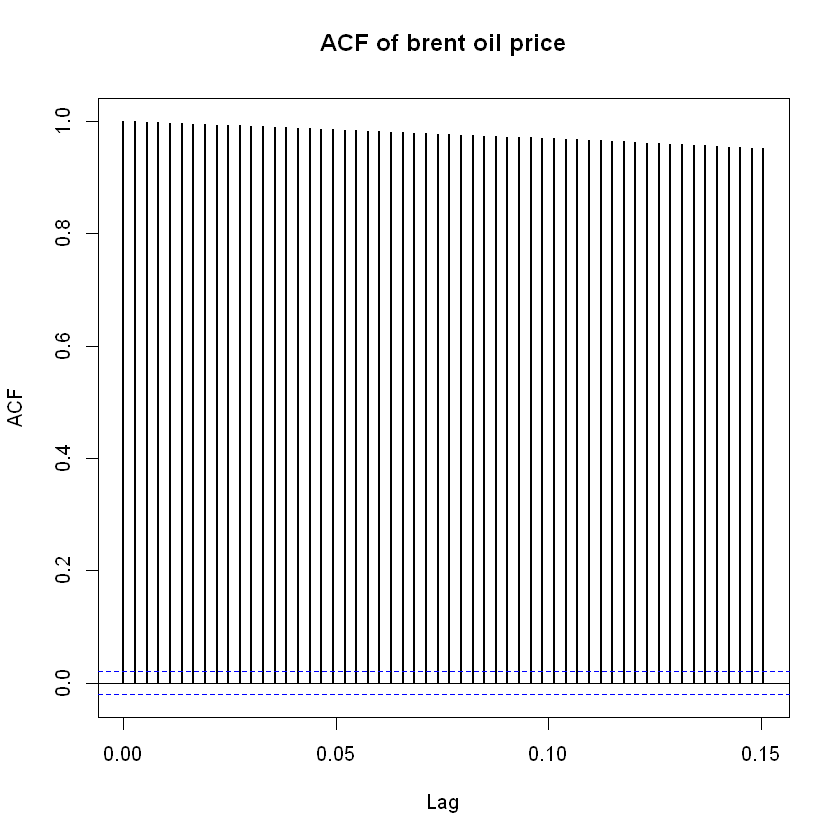

In [5]:
acf=acf(time_series,lag=55,main="ACF of brent oil price",lwd=2)

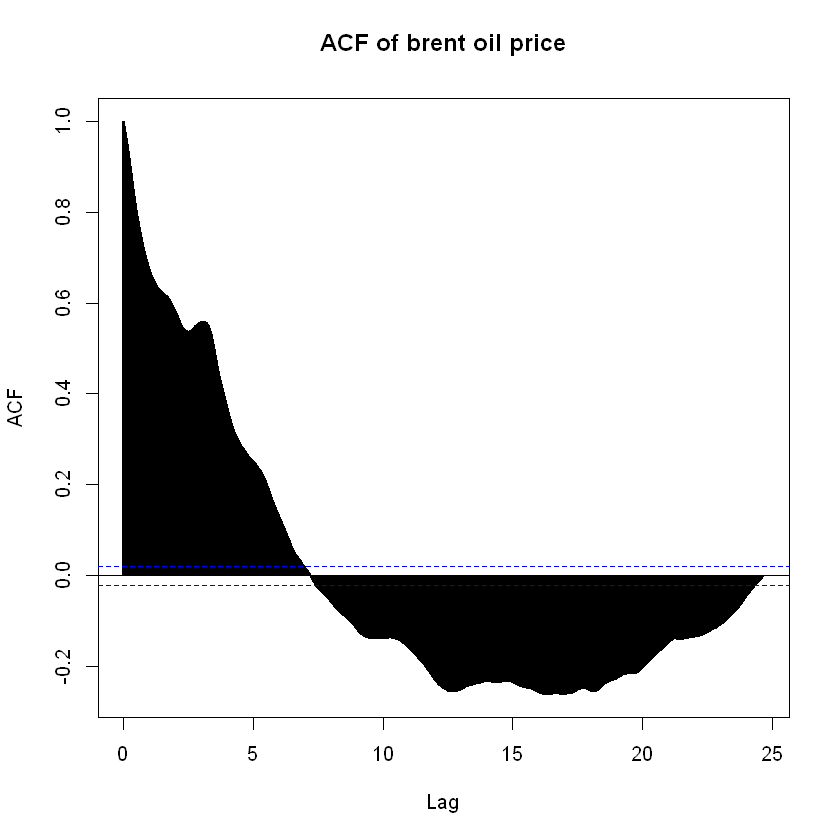

In [6]:
acf=acf(time_series,lag=9011,main="ACF of brent oil price",lwd=2)

La décroissance lente de l'autocorrélation  suggère une persistance à long terme dans la série temporelle, avec une influence significative des observations passées sur les observations futures. Cependant, le fait que l'autocorrélation finisse par se rapprocher de zéro indique que cette influence diminue progressivement au fur et à mesure que l'on examine des observations plus éloignées dans le temps. Cela peut suggérer une certaine forme de stationnarité ou de régularité dans la série, bien que la persistance à long terme reste apparente.  En résumé, la série semble présenter à la fois des tendances, des saisons et des variations cycliques.

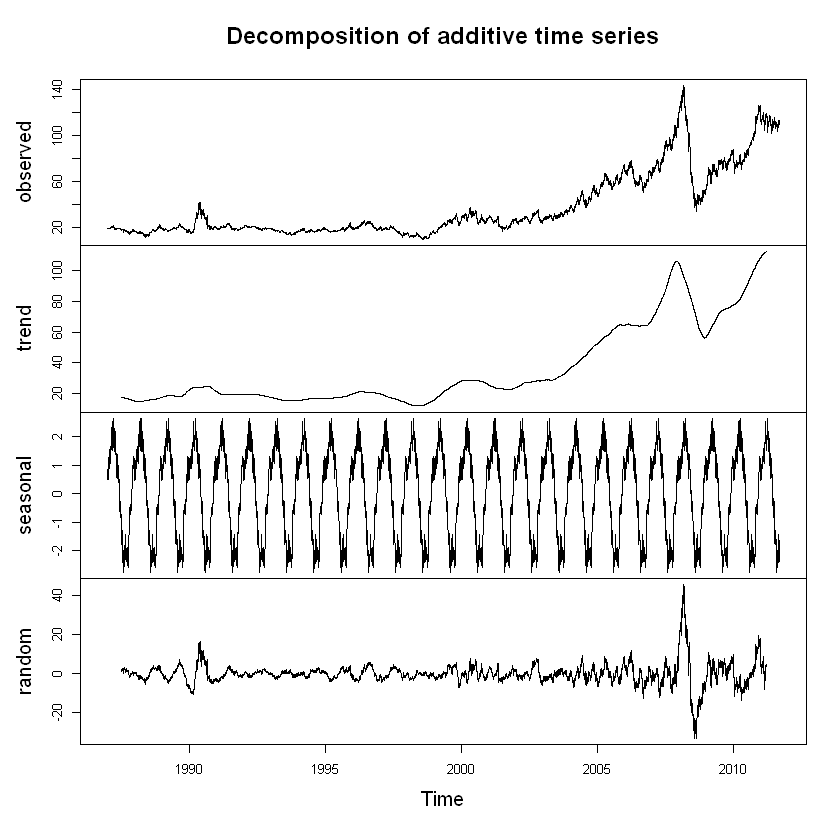

In [7]:
plot(decompose(time_series,type=c("additive")))

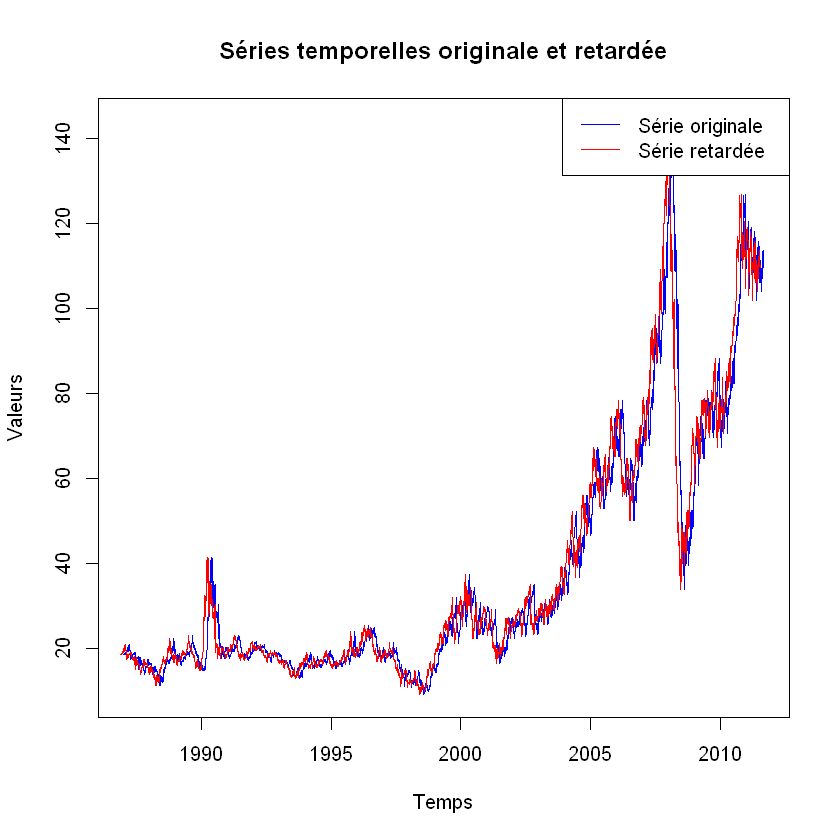

In [9]:
# Création de données de série temporelle fictives

serie_retardee <- lag(time_series, k =55)  # Exemple de décalage de 3 mois

# Tracer les deux séries temporelles
ts.plot(time_series, col = "blue", ylim = range(c(time_series, serie_retardee)),
        main = "Séries temporelles originale et retardée", ylab = "Valeurs",
        xlab = "Temps")
lines(serie_retardee, col = "red")
legend("topright", legend = c("Série originale", "Série retardée"),
       col = c("blue", "red"), lty = 1)

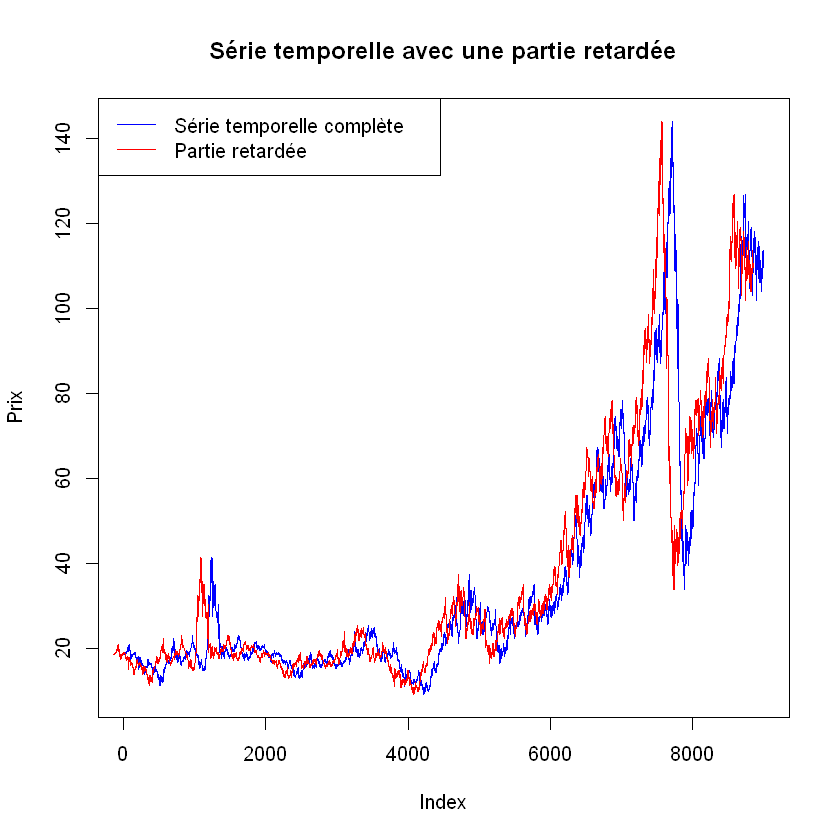

In [19]:
# Créer un nouveau graphique avec la série temporelle et la partie zoomée
plot(1:length(time_series), time_series, type = "l", col = "blue", xlab = "Index", ylab = "Prix")
points((1:length(time_series)) -150, time_series, type = "l", col = "red")

# Ajouter une légende expliquant chaque courbe
legend("topleft", legend = c("Série temporelle complète", "Partie retardée"), col = c("blue", "red"), lty = 1)

# Ajouter un titre au graphique
title("Série temporelle avec une partie retardée")


Le fait que les deux séries, représentées en bleu et en rouge, soient significativement éloignées l'une de l'autre est également corroboré par l'absence de corrélation, comme indiqué par l'autocorrélation (ACF). Lorsqu'il n'y a pas de corrélation significative entre les deux séries, cela signifie qu'elles ne partagent pas de motif commun à un retard donné. Ainsi, même si les deux séries peuvent évoluer dans le temps, elles le font de manière indépendante l'une de l'autre, ce qui peut indiquer des dynamiques différentes ou une relation plus complexe entre les variables.

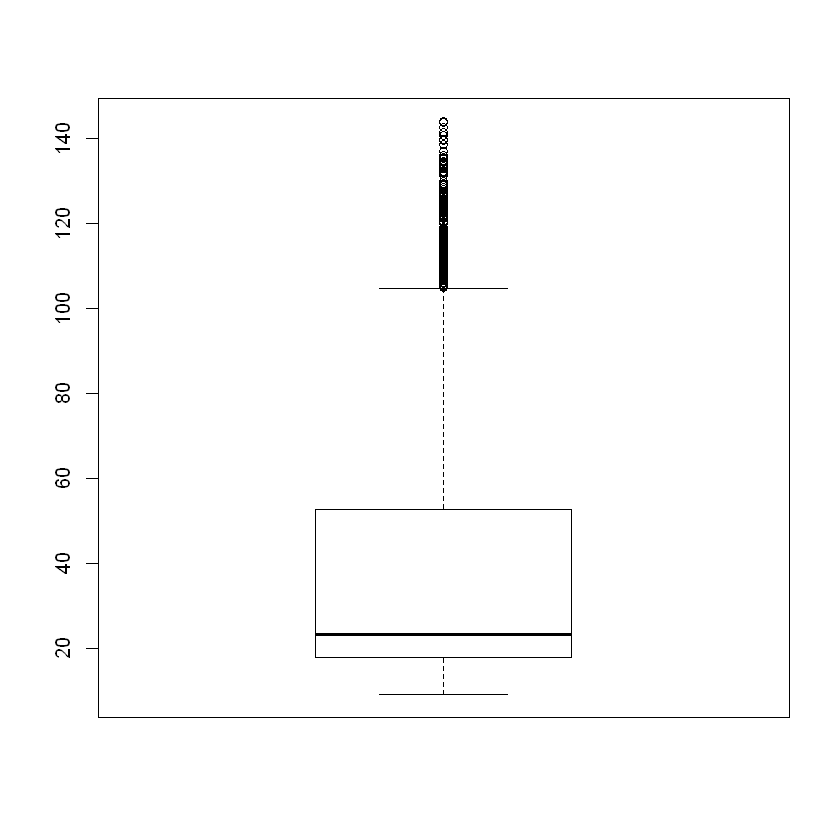

In [34]:
# Tracer le boxplot de la série temporelle
boxplot(data$Price1)

La présence de valeurs aberrantes supérieures à 100 suggère une tendance significative dans les prix du pétrole Brent au fil du temps. Ces observations pourraient refléter des changements structurels ou des événements majeurs ayant un impact durable sur le marché. Une analyse approfondie de ces tendances est essentielle pour comprendre les facteurs sous-jacents influençant les prix du pétrole à long terme.

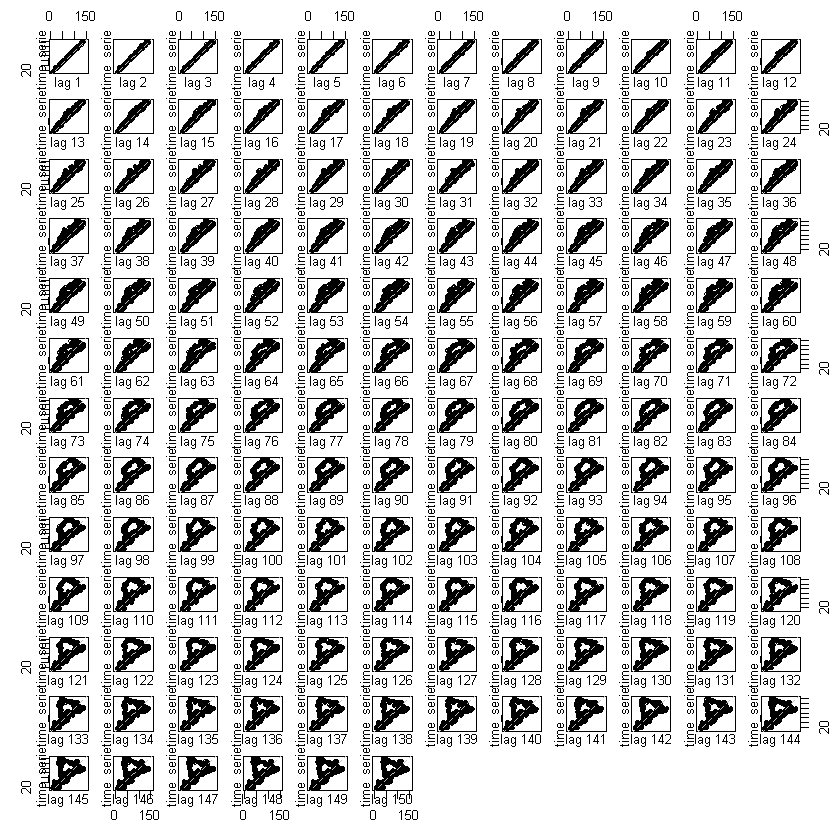

In [37]:
lag.plot(time_series,lag=150,do.lines=F)

In [67]:
# Calculer l'ACF de la série temporelle
acf_result <- acf(time_series, plot = FALSE)

# Afficher les dix premières lignes de lag et acf
print(head(cbind(lag = acf_result$lag, acf = acf_result$acf),22))


              lag       acf
 [1,] 0.000000000 1.0000000
 [2,] 0.002739726 0.9992009
 [3,] 0.005479452 0.9983891
 [4,] 0.008219178 0.9975845
 [5,] 0.010958904 0.9967691
 [6,] 0.013698630 0.9959509
 [7,] 0.016438356 0.9951403
 [8,] 0.019178082 0.9943196
 [9,] 0.021917808 0.9934635
[10,] 0.024657534 0.9926130
[11,] 0.027397260 0.9917319
[12,] 0.030136986 0.9908935
[13,] 0.032876712 0.9900598
[14,] 0.035616438 0.9892439
[15,] 0.038356164 0.9884072
[16,] 0.041095890 0.9875486
[17,] 0.043835616 0.9866793
[18,] 0.046575342 0.9858161
[19,] 0.049315068 0.9849703
[20,] 0.052054795 0.9841379
[21,] 0.054794521 0.9833294
[22,] 0.057534247 0.9824934


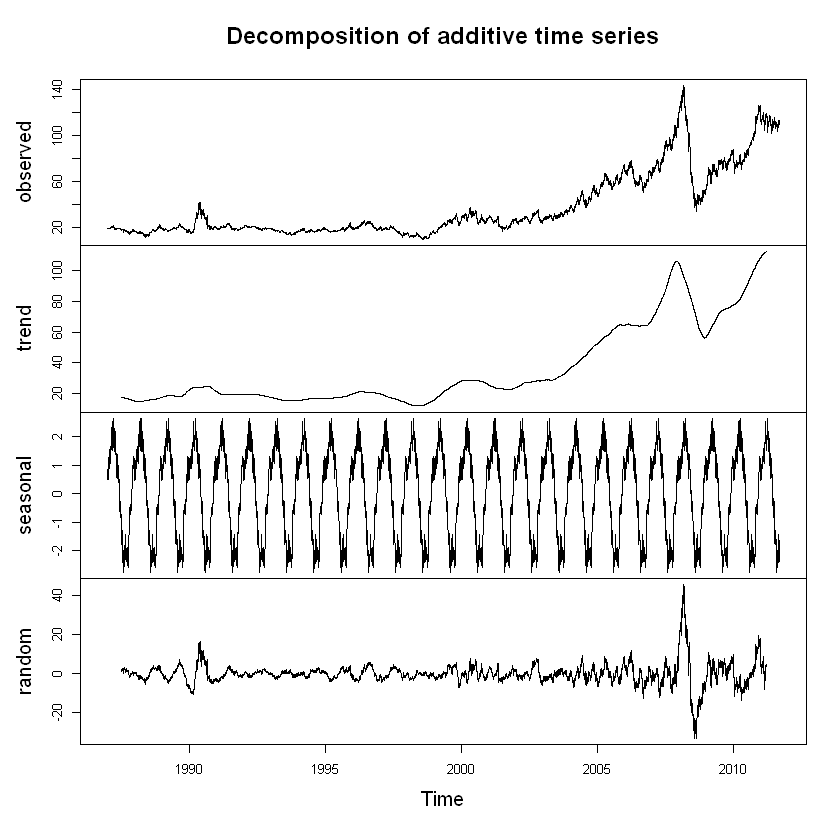

In [18]:
plot(decompose(time_series,type=c("additive")))

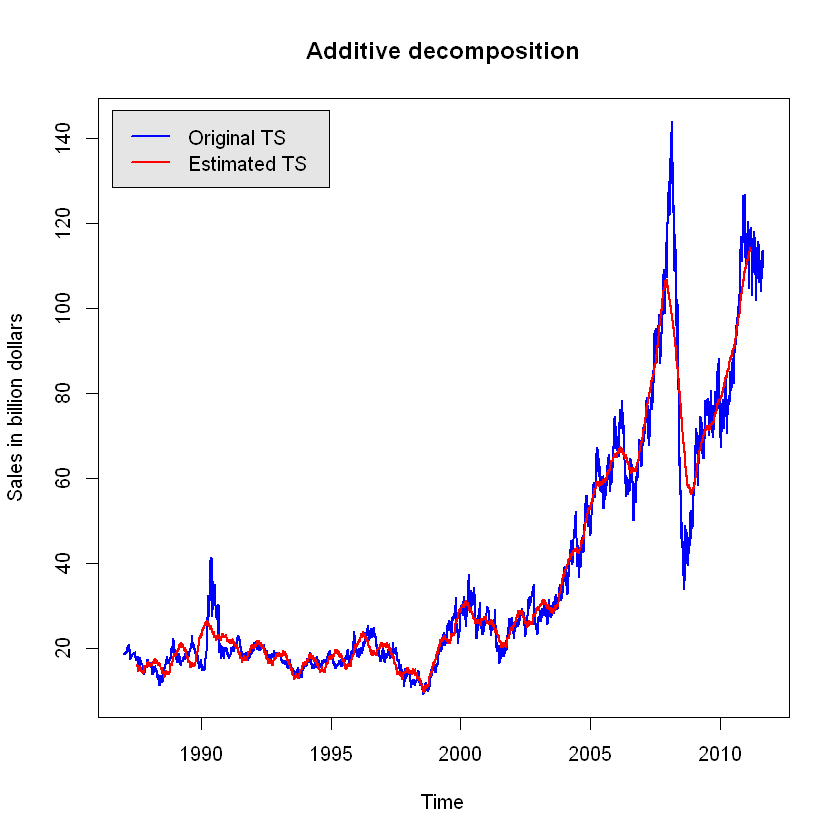

In [50]:
additive.decompose<-decompose(time_series,type=c("additive"))
additive.model<-additive.decompose$seasonal+additive.decompose$trend


plot(time_series,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Additive decomposition")
lines(additive.model,col="red",lwd=2)
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

l'ajustement inadéquat entre la série temporelle reconstituée et la série d'origine peut suggérer la présence d'une composante stochastique résiduelle non capturée par le modèle. Cette composante résiduelle peut représenter des fluctuations aléatoires non explicables par les tendances et les variations saisonnières identifiées, soulignant ainsi la nécessité de réévaluer le modèle pour mieux l'ajuster à la série temporelle observée.

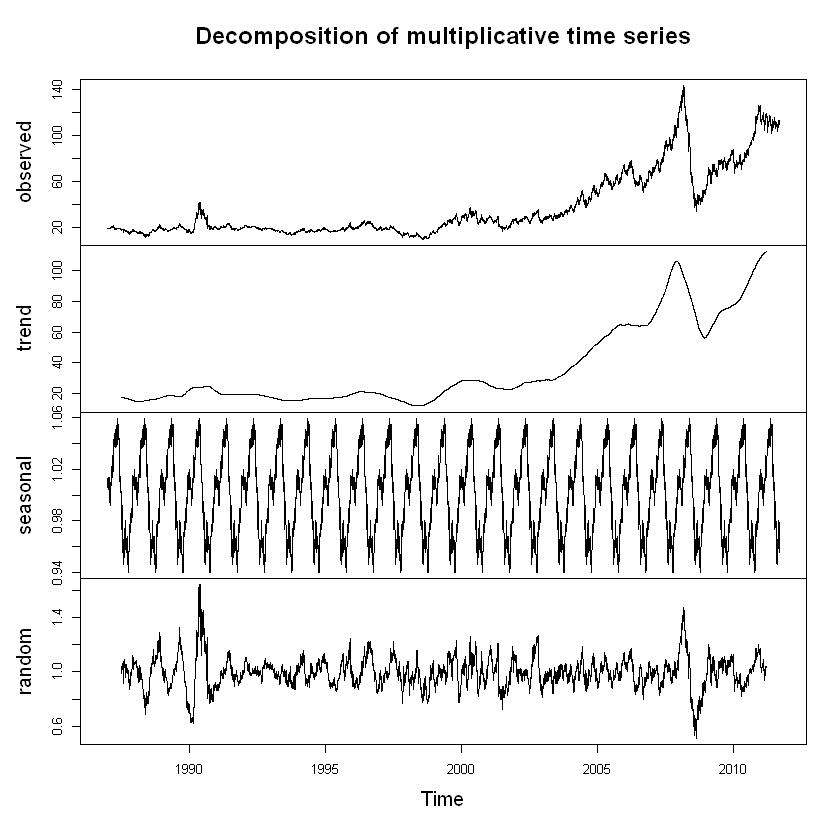

In [51]:
multiplicative.decomposition<-decompose(time_series,type=c("multiplicative"))
plot(multiplicative.decomposition)

In [52]:
multiplicative.model<-multiplicative.decomposition$seasonal*multiplicative.decomposition$trend

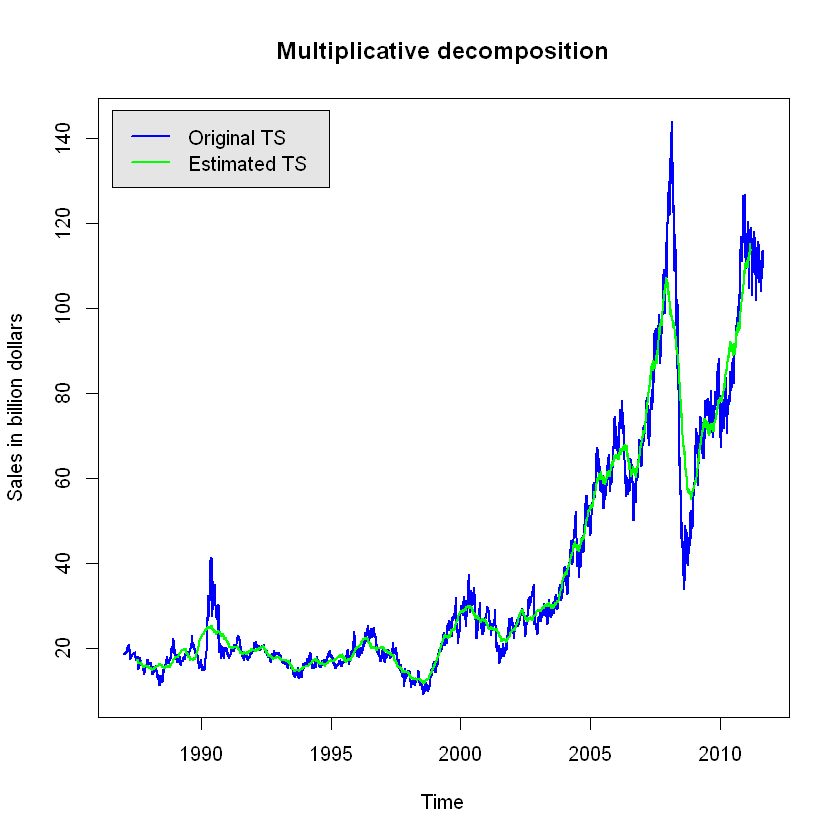

In [53]:
plot(time_series,col="blue",lwd=2,xlab="Time",ylab="Sales in billion dollars", main="Multiplicative decomposition")
lines(multiplicative.model,col="green",lwd=2)
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","green"))

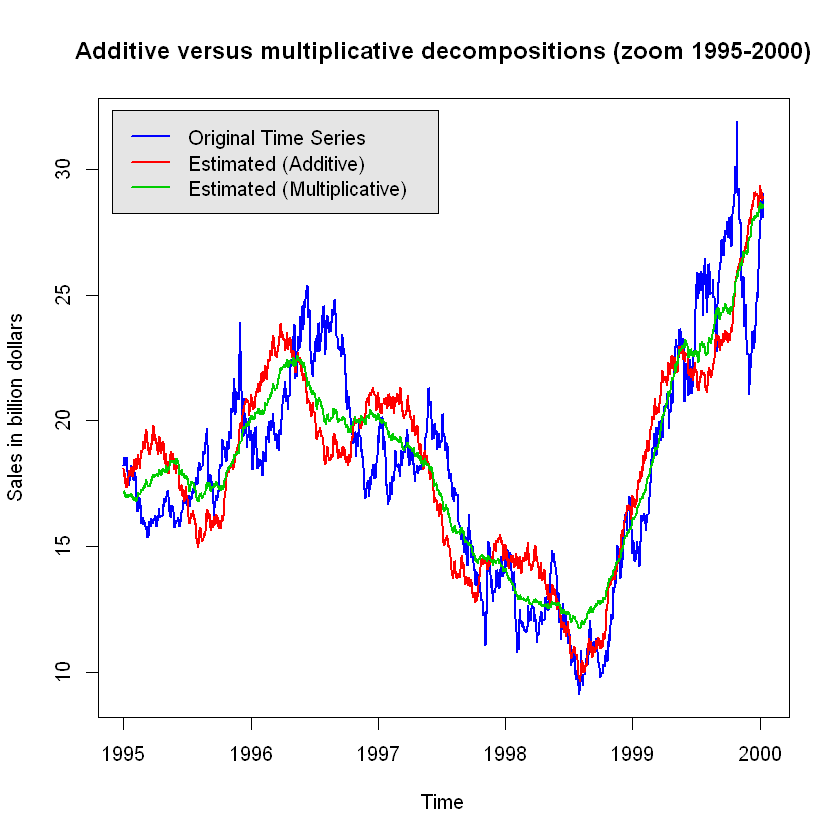

In [58]:
# Définir les limites de la période de zoom
zoom_start <- c(1995, 1)
zoom_end <- c(2000, 12)

# Extraire la partie zoomée de la série temporelle originale
time_series_zoom <- window(time_series, start = zoom_start, end = zoom_end)

# Extraire la partie zoomée des modèles additif et multiplicatif
additive_model_zoom <- window(additive.model, start = zoom_start, end = zoom_end)
multiplicative_model_zoom <- window(multiplicative.model, start = zoom_start, end = zoom_end)

# Tracer la série temporelle originale et les modèles décomposés (zoom)
plot(time_series_zoom, col = "blue", lwd = 2, xlab = "Time", ylab = "Sales in billion dollars", 
     main = "Additive versus multiplicative decompositions (zoom 1995-2000)")
lines(additive_model_zoom, col = "red", lwd = 2)
lines(multiplicative_model_zoom, col = "green3", lwd = 2)

# Ajouter une légende
legend("topleft", c("Original Time Series", "Estimated (Additive)", "Estimated (Multiplicative)"), inset = 0.02,
       bg = "gray90", lwd = c(2, 2, 2), col = c("blue", "red", "green3"))



La performance insatisfaisante des modèles peut être due à leur simplicité, ne parvenant pas à saisir toute la complexité des données réelles. De plus, la présence de données aberrantes ou atypiques peut perturber les résultats si elles ne sont pas correctement gérées. Enfin, il est possible que les modèles ne parviennent pas à capturer toute la variabilité des données, laissant ainsi une partie des variations non expliquées.

# II- Time series modeling  

# II-1- Deterministic component modeling

Dans cet exemple, la composante déterministe comprend la composante tendance et saisonnière

### The trend component  

In [20]:
# Determination of the descriptive variable related to the seasonal component

t<-c(1:length(time_series))
s.t<-(t-mean(t))/sd(t) # this variable is introduced in order to guarantee the same order of magnitude of the different descriptive variables


In [21]:
Model0<-lm(time_series~s.t)
summary(Model0)


Call:
lm(formula = time_series ~ s.t)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.583 -13.781  -2.954  10.679  78.214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   37.307      0.185   201.7   <2e-16 ***
s.t           23.039      0.185   124.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.56 on 9009 degrees of freedom
Multiple R-squared:  0.6326,	Adjusted R-squared:  0.6326 
F-statistic: 1.551e+04 on 1 and 9009 DF,  p-value: < 2.2e-16


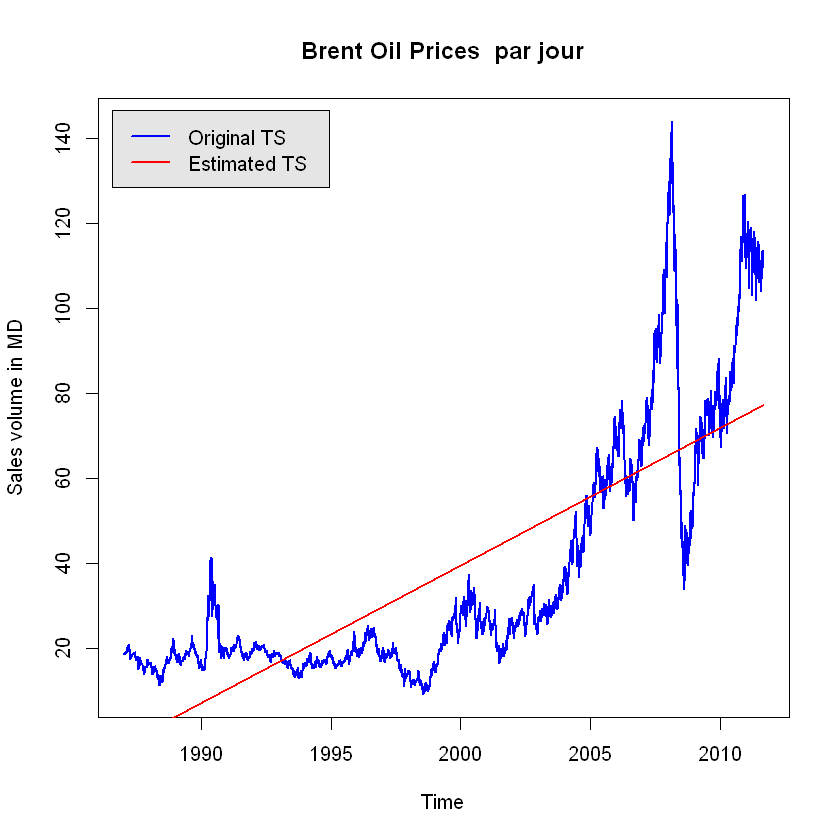

In [22]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model0),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

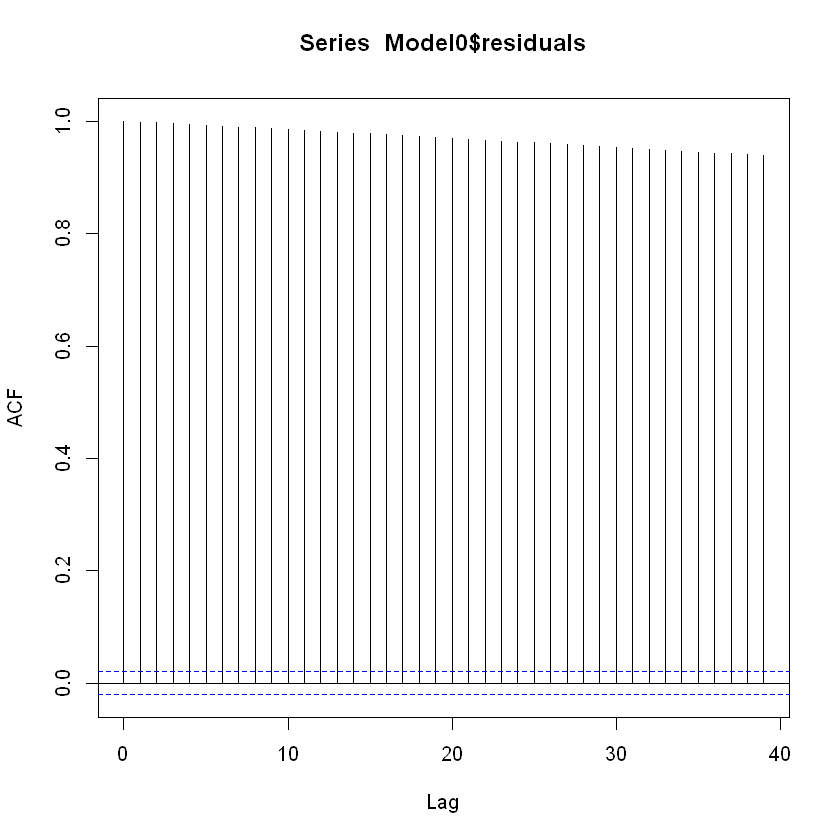

In [74]:

acf(Model0$residuals)


Ce modèle linéaire simple, basé uniquement sur une tendance linéaire, montre une certaine capacité à expliquer la variation de la série temporelle, comme le suggèrent les coefficients significatifs et les valeurs R². Cependant, sa performance est limitée car il ne capture probablement pas d'autres aspects importants de la série temporelle, ce qui peut entraîner une sous-modélisation et une perte d'informations importantes. En d'autres termes, en ne considérant qu'une seule tendance linéaire, le modèle risque de ne pas saisir tous les motifs présents dans les données, ce qui peut conduire à des résidus importants et à une mauvaise adéquation globale.

In [23]:
Model2<-lm(time_series~s.t+I(s.t^2))
summary(Model2)


Call:
lm(formula = time_series ~ s.t + I(s.t^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-43.820  -7.057   0.693   4.449  70.528 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.6069     0.1839   122.9   <2e-16 ***
s.t          23.0387     0.1226   187.9   <2e-16 ***
I(s.t^2)     14.7021     0.1371   107.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.64 on 9008 degrees of freedom
Multiple R-squared:  0.8387,	Adjusted R-squared:  0.8386 
F-statistic: 2.341e+04 on 2 and 9008 DF,  p-value: < 2.2e-16


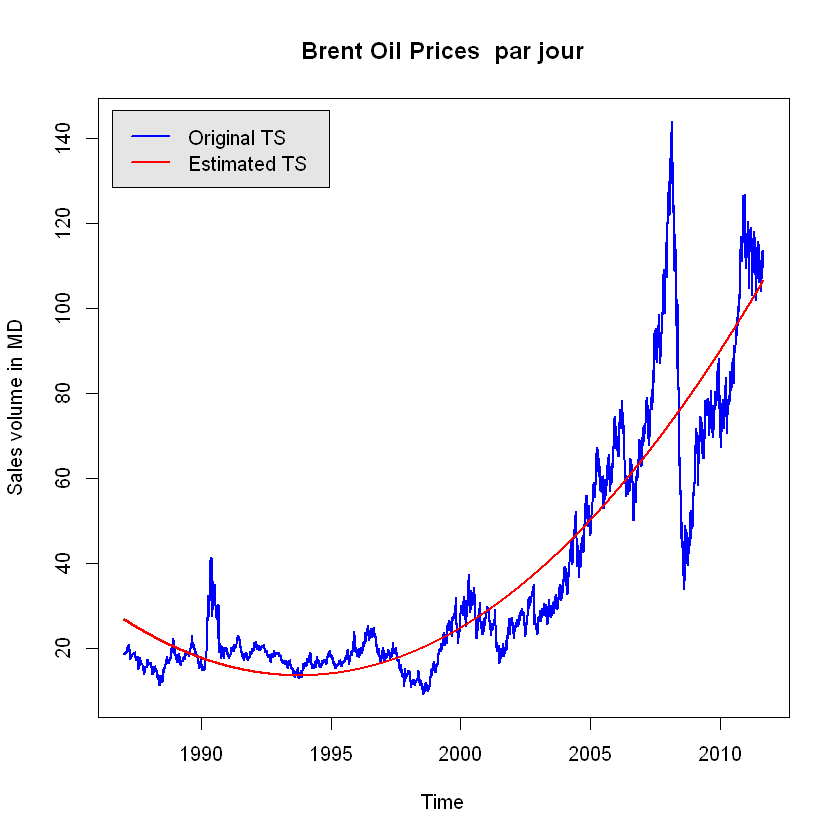

In [25]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model2),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

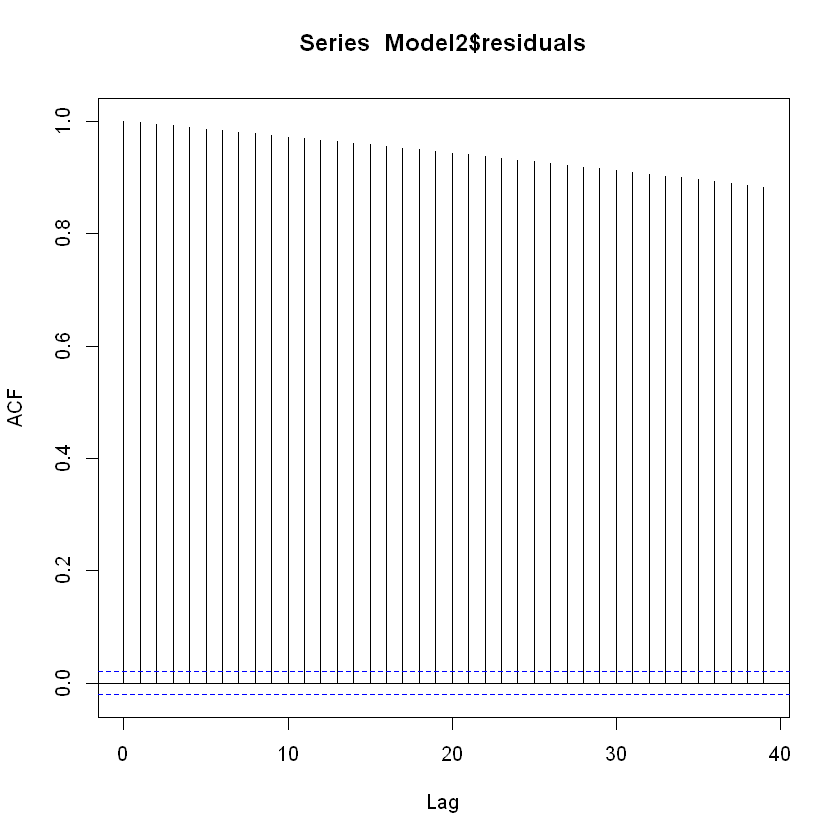

In [77]:
acf(Model2$residuals)

Ce modèle amélioré inclut à la fois une tendance linéaire et un terme quadratique, ce qui permet de mieux capturer la forme non linéaire de la série temporelle. Les coefficients significatifs et les valeurs R² élevées indiquent une meilleure adéquation aux données par rapport au modèle précédent. Cependant, malgré cette amélioration, il est possible qu'il subsiste encore des motifs non capturés, ce qui suggère qu'une exploration plus poussée des structures temporelles pourrait être bénéfique pour obtenir une meilleure modélisation de la série.

### Modélisation de la tendance et de la composante saisonnière sans break points


In [27]:
T=365
MC=matrix(0,length(p),(T/2))
MS=matrix(0,length(p),(T/2))
for(i in 1:(T/2)){MC[,i]=cos(2*pi*i*t/T)}
for(i in 1:(T/2)){MS[,i]=sin(2*pi*i*t/T)}

In [28]:
Model3<-lm(time_series~s.t+MS+MC)
summary(Model3)


Call:
lm(formula = time_series ~ s.t + MS + MC)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.784 -13.871  -2.754  10.233  76.203 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.729e+01  1.880e-01 198.356   <2e-16 ***
s.t          2.306e+01  1.880e-01 122.626   <2e-16 ***
MS1          2.192e+00  2.662e-01   8.237   <2e-16 ***
MS2         -5.623e-02  2.656e-01  -0.212   0.8324    
MS3         -1.622e-01  2.660e-01  -0.610   0.5421    
MS4         -1.343e-01  2.659e-01  -0.505   0.6135    
MS5          1.830e-01  2.658e-01   0.688   0.4912    
MS6         -6.812e-02  2.659e-01  -0.256   0.7978    
MS7         -1.074e-01  2.658e-01  -0.404   0.6862    
MS8          1.235e-01  2.659e-01   0.464   0.6424    
MS9          3.702e-02  2.659e-01   0.139   0.8893    
MS10         3.488e-02  2.658e-01   0.131   0.8956    
MS11         8.717e-02  2.659e-01   0.328   0.7431    
MS12        -9.945e-02  2.659e-01  -0.374   0.7084    
MS13        -7.85

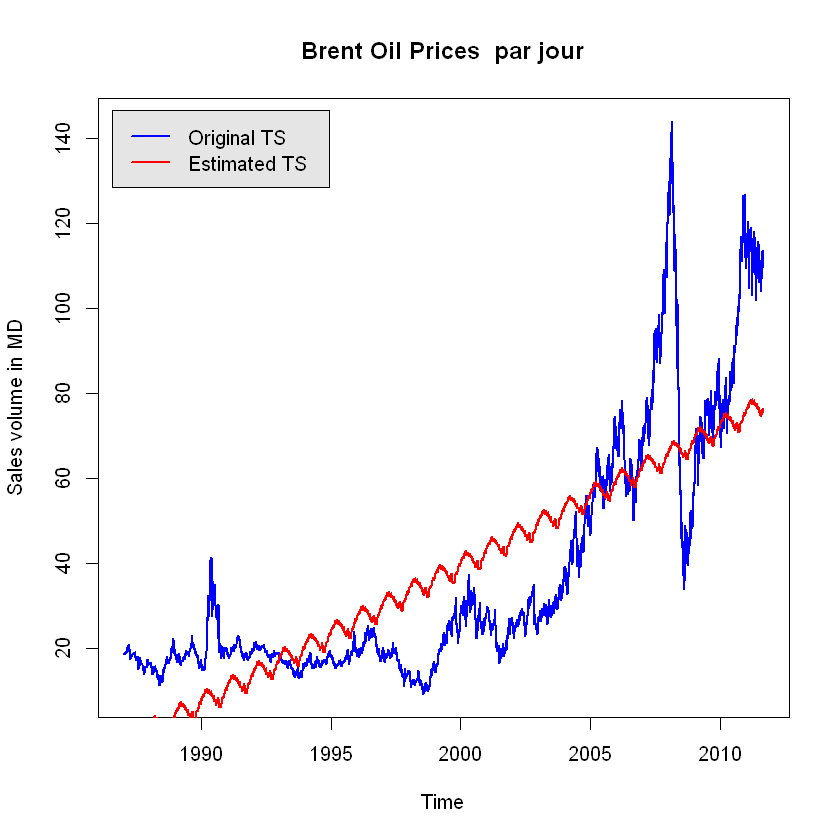

In [29]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model3),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [30]:
Model4<-lm(time_series~s.t+I(s.t^2)+MS+MC)
summary(Model4)


Call:
lm(formula = time_series ~ s.t + I(s.t^2) + MS + MC)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.609  -7.384   0.450   4.727  68.887 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.262e+01  1.862e-01 121.433  < 2e-16 ***
s.t          2.306e+01  1.242e-01 185.673  < 2e-16 ***
I(s.t^2)     1.469e+01  1.389e-01 105.714  < 2e-16 ***
MS1          1.678e+00  1.759e-01   9.540  < 2e-16 ***
MS2         -3.896e-01  1.755e-01  -2.220   0.0264 *  
MS3         -1.741e-01  1.757e-01  -0.991   0.3218    
MS4         -2.258e-01  1.756e-01  -1.286   0.1986    
MS5          3.352e-02  1.756e-01   0.191   0.8486    
MS6         -8.984e-02  1.756e-01  -0.512   0.6090    
MS7         -1.376e-01  1.756e-01  -0.784   0.4332    
MS8          2.753e-02  1.756e-01   0.157   0.8754    
MS9          7.067e-03  1.756e-01   0.040   0.9679    
MS10         2.633e-02  1.756e-01   0.150   0.8808    
MS11         2.164e-02  1.756e-01   0.123   0.9019    
MS12  

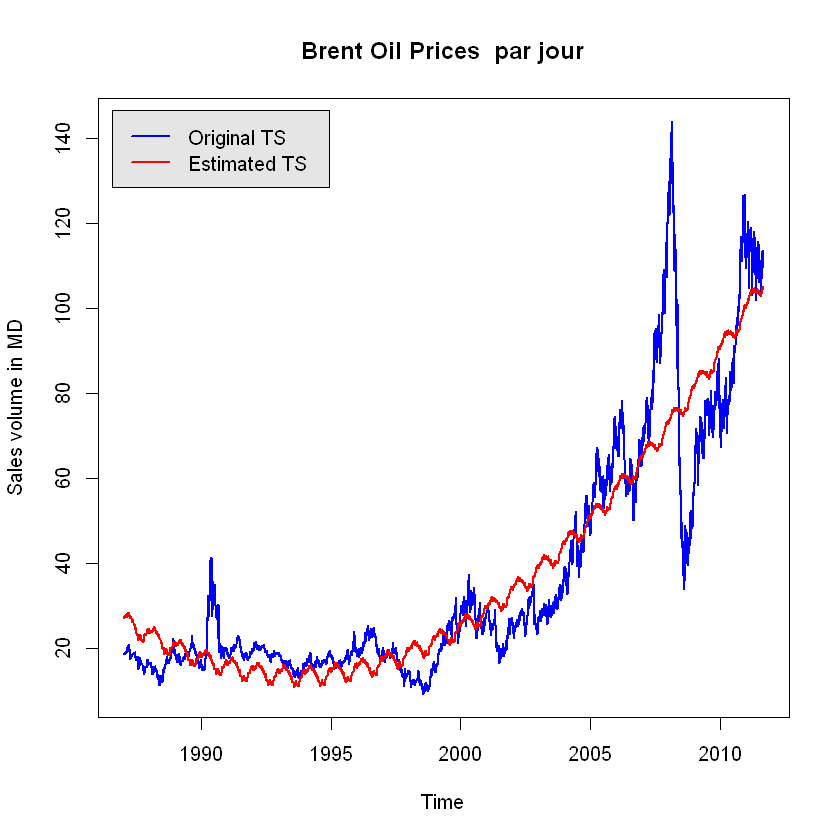

In [31]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model4),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [32]:
Model5<-lm(time_series~s.t+I(s.t^2)+I(t^3)+MS+MC)
summary(Model5)


Call:
lm(formula = time_series ~ s.t + I(s.t^2) + I(t^3) + MS + MC)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.124  -5.836  -0.315   3.751  69.681 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.054e+00  8.295e-01  10.914  < 2e-16 ***
s.t         -5.127e+00  1.686e+00  -3.041  0.00236 ** 
I(s.t^2)     1.126e+00  8.204e-01   1.373  0.16993    
I(t^3)       1.482e-10  8.843e-12  16.764  < 2e-16 ***
MS1          1.726e+00  1.731e-01   9.969  < 2e-16 ***
MS2         -3.806e-01  1.727e-01  -2.204  0.02756 *  
MS3         -1.298e-01  1.729e-01  -0.750  0.45301    
MS4         -2.073e-01  1.728e-01  -1.200  0.23025    
MS5          3.428e-02  1.728e-01   0.198  0.84275    
MS6         -7.056e-02  1.729e-01  -0.408  0.68314    
MS7         -1.231e-01  1.728e-01  -0.712  0.47622    
MS8          2.755e-02  1.728e-01   0.159  0.87337    
MS9          1.710e-02  1.728e-01   0.099  0.92119    
MS10         3.873e-02  1.728e-01   0.224  0.82263  

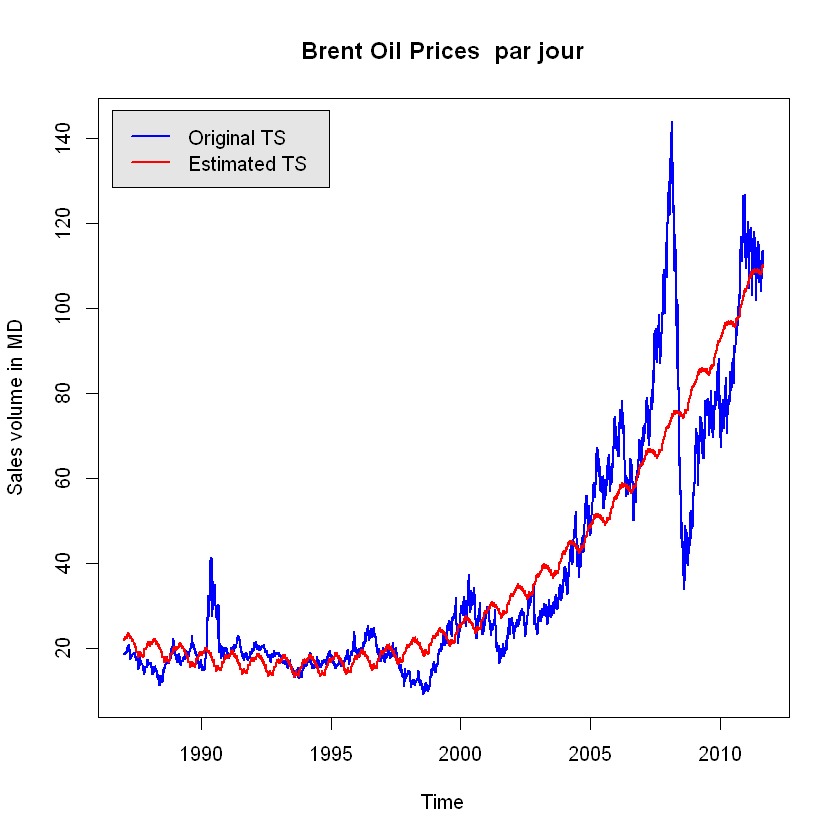

In [33]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model5),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [34]:
# with dummy variables
# n=number of periods, k= index, T=period
VD<-function(n,k,T)
{x<-rep(0,T*n)
for (i in 0:(n-1)){x[k+i*T]<-1}
x
}
MVD<-matrix(0,9021,10)
for(i in 1:10) MVD[,i]<-VD(902.1,i,10)
MVDF<-MVD[1:(901.1*10),]
MVDF


1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0


In [35]:
Model6<-lm(time_series~s.t+MVDF)
summary(Model6)


Call:
lm(formula = time_series ~ s.t + MVDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.613 -13.777  -2.949  10.676  78.211 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.298326   0.585260  63.729   <2e-16 ***
s.t         23.038721   0.185076 124.483   <2e-16 ***
MVDF1        0.003425   0.827453   0.004    0.997    
MVDF2       -0.034177   0.827683  -0.041    0.967    
MVDF3        0.020340   0.827683   0.025    0.980    
MVDF4        0.039664   0.827683   0.048    0.962    
MVDF5        0.021418   0.827683   0.026    0.979    
MVDF6        0.012295   0.827683   0.015    0.988    
MVDF7        0.016957   0.827683   0.020    0.984    
MVDF8        0.002840   0.827683   0.003    0.997    
MVDF9        0.007968   0.827683   0.010    0.992    
MVDF10             NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.57 on 

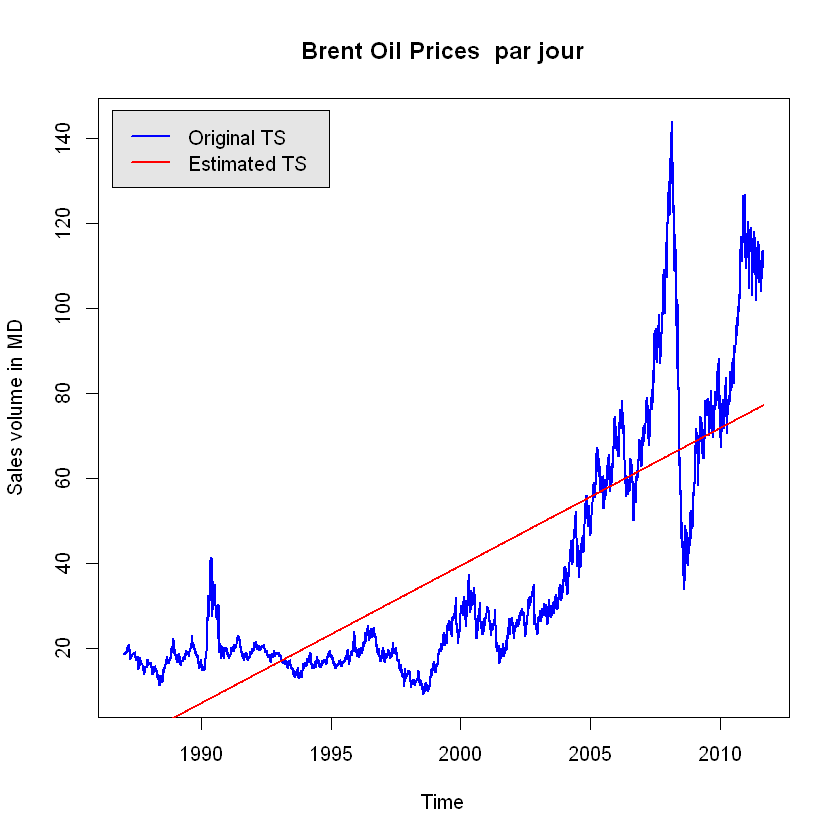

In [36]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model6),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [37]:
Model7<-lm(time_series~s.t+I(s.t^2)+MVDF)
summary(Model7)


Call:
lm(formula = time_series ~ s.t + I(s.t^2) + MVDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.853  -7.048   0.693   4.444  70.522 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.601063   0.411370  54.941   <2e-16 ***
s.t         23.038721   0.122651 187.840   <2e-16 ***
I(s.t^2)    14.702141   0.137135 107.209   <2e-16 ***
MVDF1       -0.029182   0.548358  -0.053    0.958    
MVDF2       -0.034177   0.548510  -0.062    0.950    
MVDF3        0.020356   0.548510   0.037    0.970    
MVDF4        0.039690   0.548510   0.072    0.942    
MVDF5        0.021451   0.548510   0.039    0.969    
MVDF6        0.012330   0.548510   0.022    0.982    
MVDF7        0.016990   0.548510   0.031    0.975    
MVDF8        0.002866   0.548510   0.005    0.996    
MVDF9        0.007984   0.548510   0.015    0.988    
MVDF10             NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**

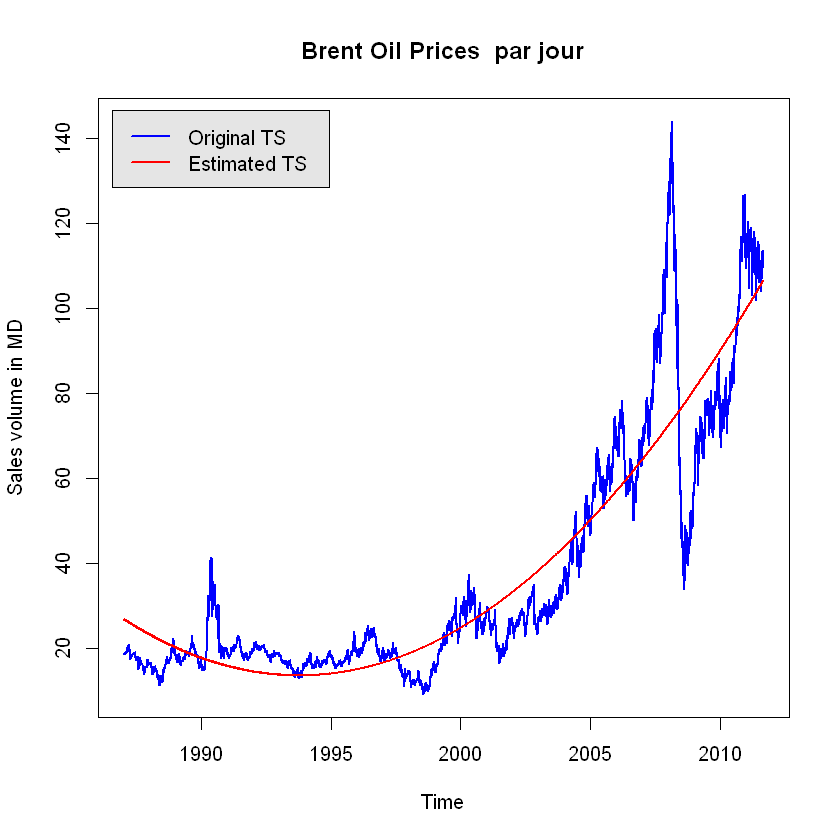

In [38]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model7),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [39]:
Model8<-lm(time_series~s.t+I(s.t^2)+I(s.t^3)+MVDF)
summary(Model8)


Call:
lm(formula = time_series ~ s.t + I(s.t^2) + I(s.t^3) + MVDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.510  -5.375  -0.109   3.192  71.399 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.596333   0.405178  55.769   <2e-16 ***
s.t         18.422212   0.302011  60.999   <2e-16 ***
I(s.t^2)    14.702141   0.135071 108.848   <2e-16 ***
I(s.t^3)     2.565013   0.153794  16.678   <2e-16 ***
MVDF1       -0.024452   0.540104  -0.045    0.964    
MVDF2       -0.024718   0.540254  -0.046    0.964    
MVDF3        0.028633   0.540254   0.053    0.958    
MVDF4        0.046784   0.540253   0.087    0.931    
MVDF5        0.027363   0.540253   0.051    0.960    
MVDF6        0.017060   0.540253   0.032    0.975    
MVDF7        0.020537   0.540253   0.038    0.970    
MVDF8        0.005231   0.540253   0.010    0.992    
MVDF9        0.009166   0.540253   0.017    0.986    
MVDF10             NA     

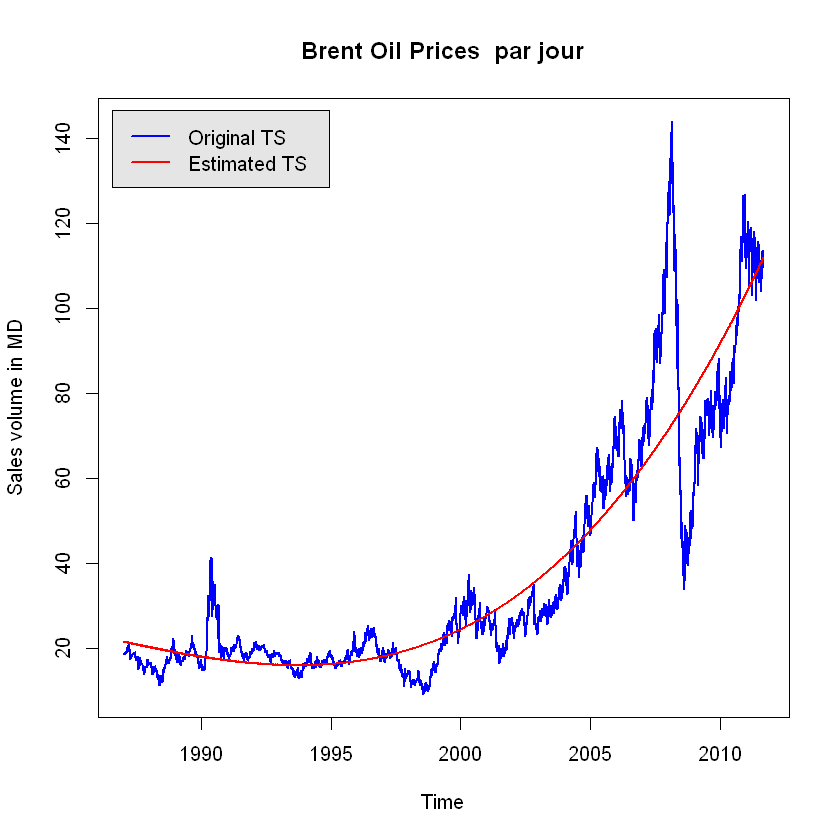

In [40]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model8),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [41]:
AIC(Model3,Model4,Model5,Model6,Model7,Model8)

,df,AIC
Model3,367,77864.67
Model4,368,70389.34
Model5,369,70103.00
Model6,12,77237.12
Model7,13,69823.43
Model8,14,69551.08


In [42]:
BIC(Model3,Model4,Model5,Model6,Model7,Model8)

,df,BIC
Model3,367,80472.65
Model4,368,73004.42
Model5,369,72725.19
Model6,12,77322.40
Model7,13,69915.81
Model8,14,69650.57


### dou le model le plus fiable cest le model 8 qui avait un BIC et AIC les plus basses et Adjusted R-squared:  0.8385 la plus haute

### modelisation with breakpoints


In [43]:
# Installer et charger le package strucchange

library(strucchange)

# Créer un vecteur de temps
t <- 1:length(time_series)

# Utiliser breakpoints() pour détecter les points de rupture
bp <- breakpoints(time_series ~ t)
summary(bp)

bp$breakpoints

Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich



	 Optimal (m+1)-segment partition: 

Call:
breakpoints.formula(formula = time_series ~ t)

Breakpoints at observation number:
                                
m = 1                  6194     
m = 2                  5828 7660
m = 3             4492 5976 7660
m = 4   1351      4466 5976 7660
m = 5   1351 3096 4447 5976 7660

Corresponding to breakdates:
                                                         
m = 1                                 2003(358)          
m = 2                                 2002(357) 2007(364)
m = 3                       1999(116) 2003(140) 2007(364)
m = 4   1990(260)           1999(90)  2003(140) 2007(364)
m = 5   1990(260) 1995(180) 1999(71)  2003(140) 2007(364)

Fit:
                                                   
m   0       1       2       3       4       5      
RSS 2777573 1082972  968826  918740  904920  896647
BIC   77240   68781   67804   67353   67244   67189

[1] 1351 3096 4447 5976 7660

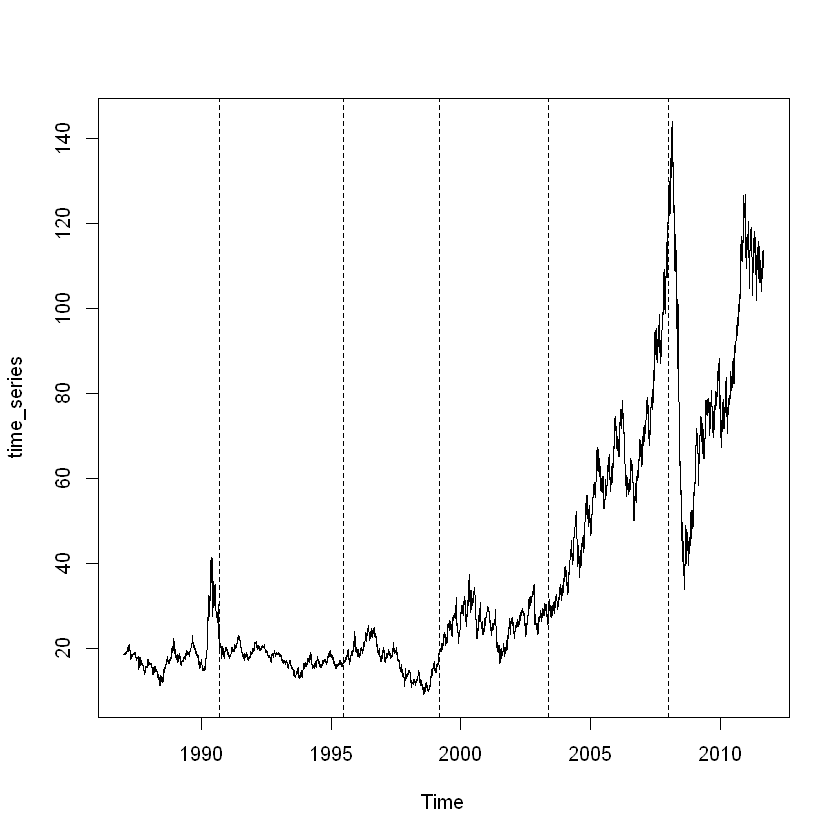

In [44]:
plot(time_series)
lines(bp)

In [47]:
dummy11<-ifelse(t>bp$breakpoints[1]& t<=bp$breakpoints[2],1,0)
dummy21<-ifelse(t>bp$breakpoints[2] & t<=bp$breakpoints[3],1,0)
dummy31<-ifelse(t>bp$breakpoints[3] & t<=bp$breakpoints[4],1,0)
dummy41<-ifelse(t>bp$breakpoints[4] & t<=bp$breakpoints[5],1,0)
dummy51<-ifelse(t>bp$breakpoints[5],1,0)

In [48]:
length(time_series)
length(t)
length(dummy11)
length(dummy21)
length(dummy31)
length(dummy41)
length(dummy51)
ncol(MVDF)

[1] 9011

[1] 9011

[1] 9011

[1] 9011

[1] 9011

[1] 9011

[1] 9011

[1] 10

In [49]:
Model9<-lm(time_series~t*dummy11+t*dummy21+t*dummy31+t*dummy41+t*dummy51+MVDF)


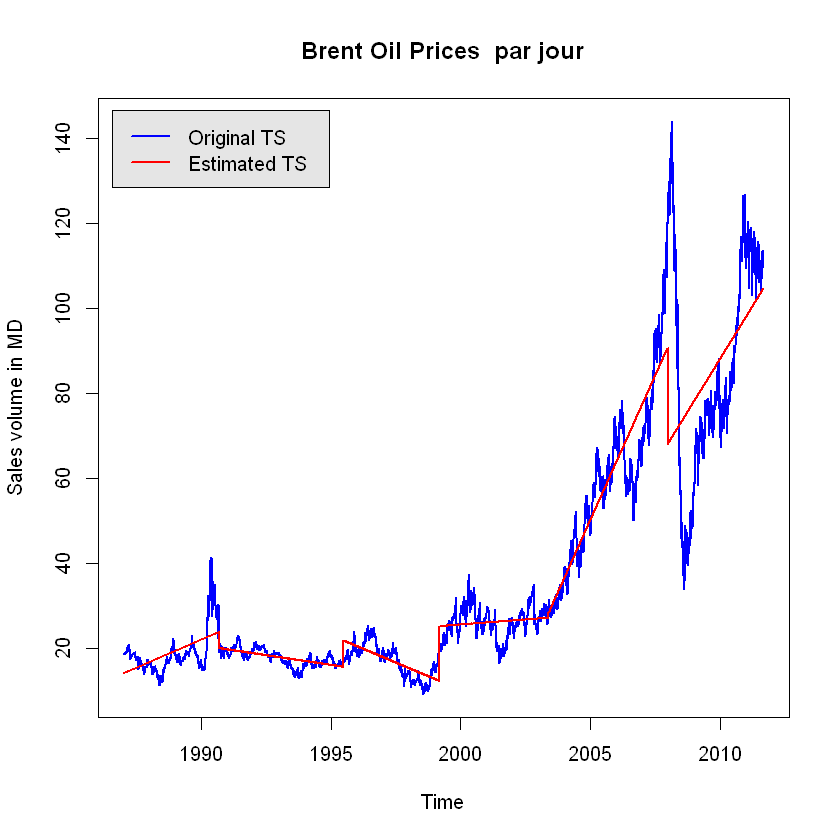

In [50]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model9),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [51]:
Model10<-lm(time_series~t*dummy11+t*dummy21+t*dummy31+t*dummy41+t*dummy51+MC+MS)


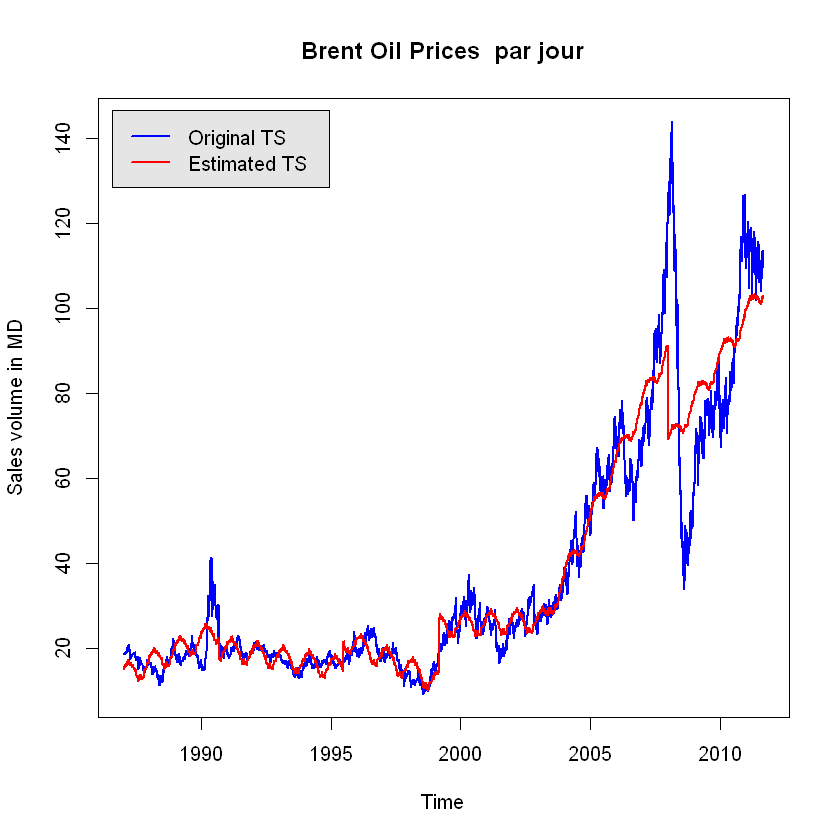

In [52]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model10),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [53]:

t<-c(1:length(time_series))
bp2<-breakpoints(time_series~t+I(t^2))
bp2

Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production de NaN"Warning message in sqrt(fr):
"production


	 Optimal 6-segment partition: 

Call:
breakpoints.formula(formula = time_series ~ t + I(t^2))

Breakpoints at observation number:
1351 3406 4905 6307 7660 

Corresponding to breakdates:
1990(260) 1996(125) 2000(164) 2004(106) 2007(364) 

In [54]:
bp2$breakpoints

[1] 1351 3406 4905 6307 7660

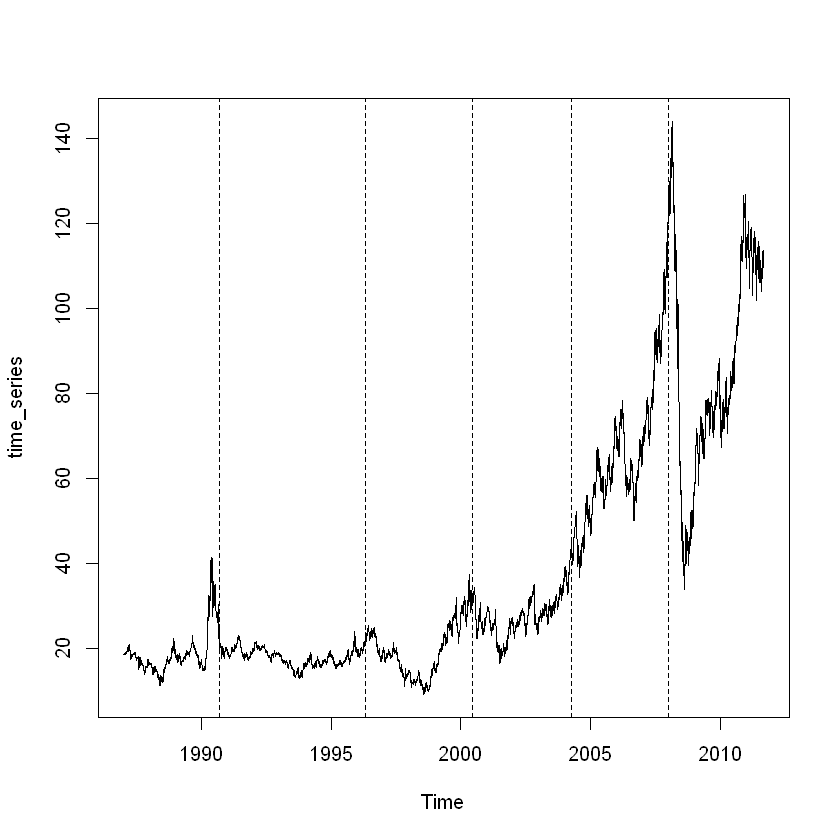

In [55]:
plot(time_series)
lines(bp2)

In [56]:
dummy1<-ifelse(t>bp2$breakpoints[1]& t<=bp2$breakpoints[2],1,0)
dummy2<-ifelse(t>bp2$breakpoints[2] & t<=bp2$breakpoints[3],1,0)
dummy3<-ifelse(t>bp2$breakpoints[3] & t<=bp2$breakpoints[4],1,0)
dummy4<-ifelse(t>bp2$breakpoints[4] & t<=bp2$breakpoints[5],1,0)
dummy5<-ifelse(t>bp2$breakpoints[5],1,0)

In [57]:
Model11<-lm(time_series~dummy1*(t+I(t^2))+dummy2*(t+I(t^2))+dummy3*(t+I(t^2))+dummy4*(t+I(t^2))+dummy5*(t+I(t^2))+MS+MC)



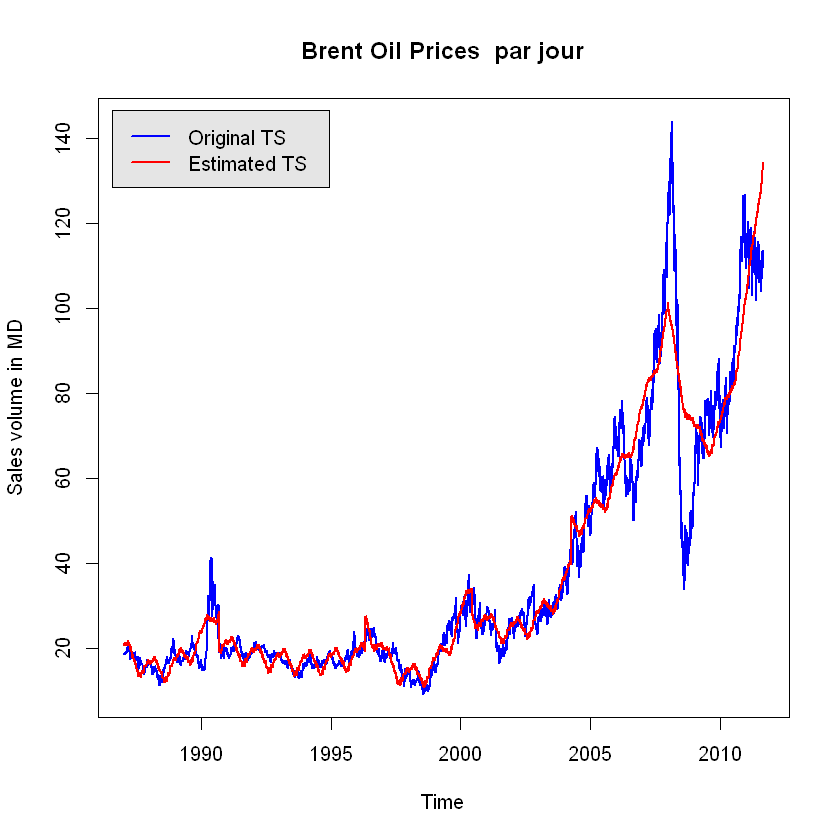

In [58]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model11),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [59]:
Model12<-lm(time_series~dummy1*(t+I(t^2))+dummy2*(t+I(t^2))+dummy3*(t+I(t^2))+dummy4*(t+I(t^2))+dummy5*(t+I(t^2))+MVDF)



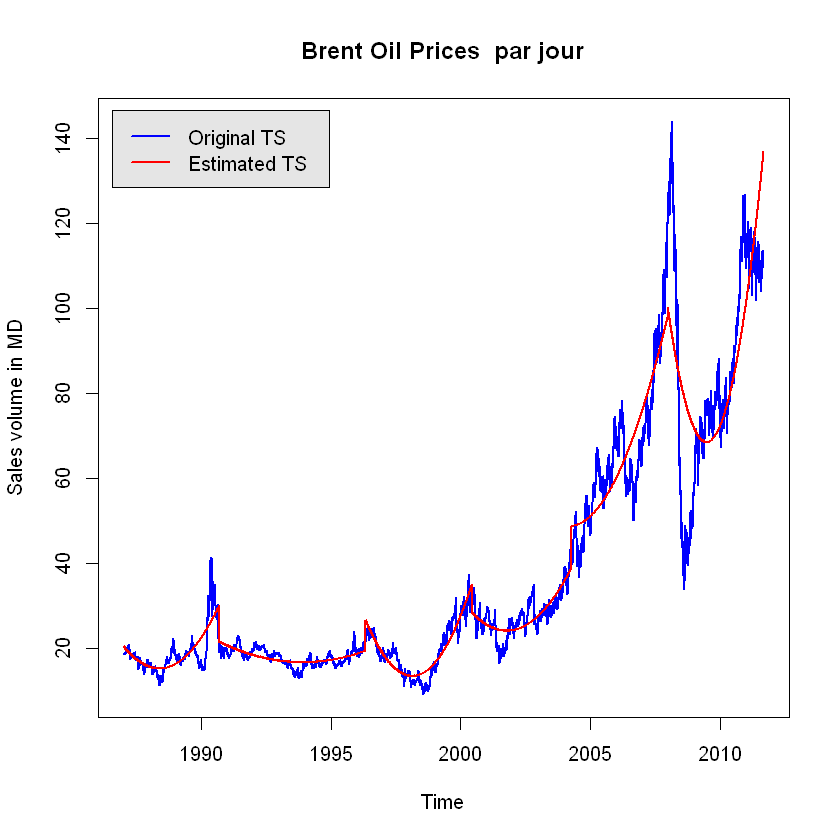

In [61]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model12),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [62]:
Model13<-lm(time_series~dummy1*(t+I(t^2))+dummy2*(t+I(t^2))+dummy3*(t+I(t^2))+dummy4*(t+I(t^2))+dummy5*(t+I(t^2))+MS+MC)



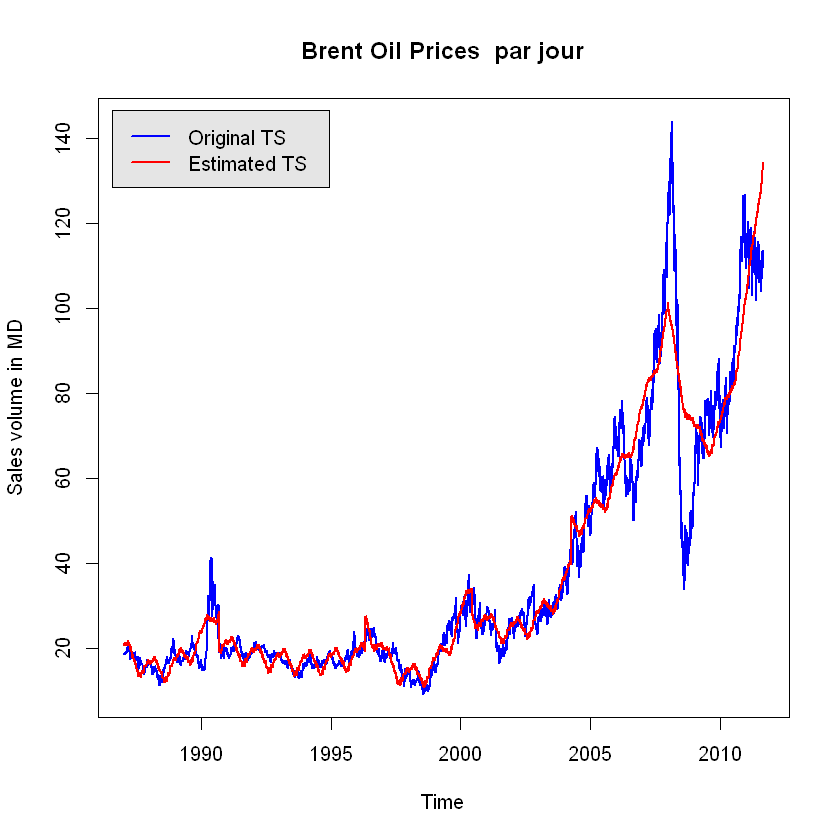

In [63]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model13),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [64]:
Model14<-lm(time_series~dummy1*(t+I(t^2)+I(t^3))+dummy2*(t+I(t^2)+I(t^3))+dummy3*(t+I(t^2)+I(t^3))+dummy4*(t+I(t^2)+I(t^3))+dummy5*(t+I(t^2)+I(t^3))+MVDF)



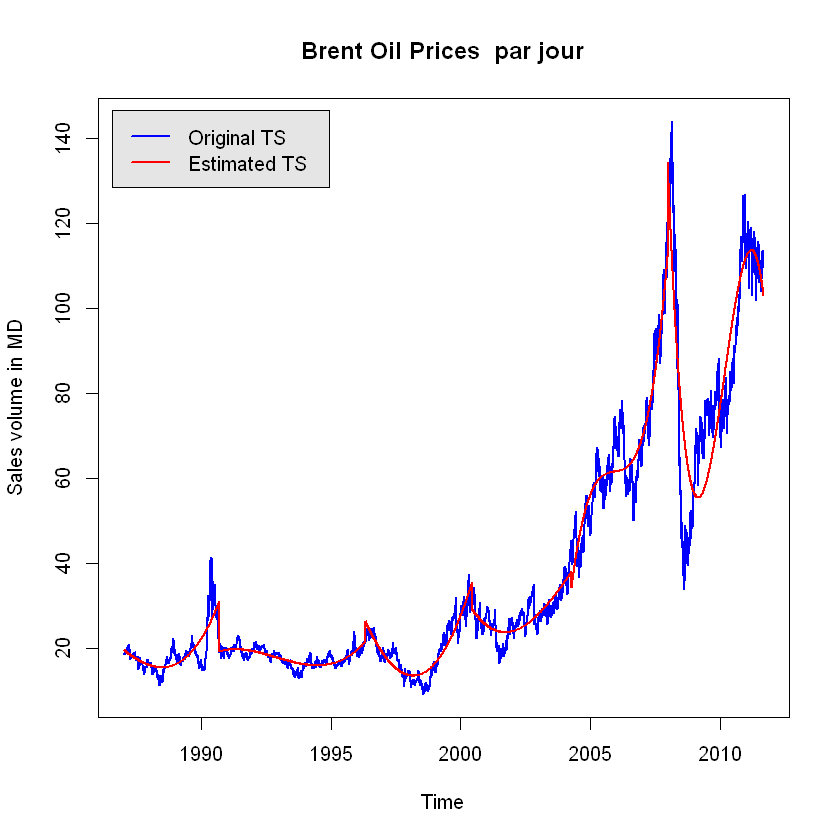

In [65]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model14),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [66]:
Model15<-lm(time_series~dummy1*(t+I(t^2)+I(t^3)+I(t^4))+dummy2*(t+I(t^2)+I(t^3)+I(t^4))+dummy3*(t+I(t^2)+I(t^3)+I(t^4))+dummy4*(t+I(t^2)+I(t^3)+I(t^4))+dummy5*(t+I(t^2)+I(t^3)+I(t^4))+MS+MC)
summary(Model15)



Call:
lm(formula = time_series ~ dummy1 * (t + I(t^2) + I(t^3) + I(t^4)) + 
    dummy2 * (t + I(t^2) + I(t^3) + I(t^4)) + dummy3 * (t + I(t^2) + 
    I(t^3) + I(t^4)) + dummy4 * (t + I(t^2) + I(t^3) + I(t^4)) + 
    dummy5 * (t + I(t^2) + I(t^3) + I(t^4)) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.4003  -1.9779  -0.1312   2.0071  28.7025 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.005e+01  7.405e-01  27.078  < 2e-16 ***
dummy1        -1.714e+02  3.889e+01  -4.407 1.06e-05 ***
t             -2.854e-02  7.561e-03  -3.775 0.000161 ***
I(t^2)         6.938e-05  2.269e-05   3.058 0.002237 ** 
I(t^3)        -7.370e-08  2.520e-08  -2.925 0.003451 ** 
I(t^4)         3.216e-11  9.244e-12   3.479 0.000506 ***
dummy2        -1.802e+04  1.700e+03 -10.596  < 2e-16 ***
dummy3         6.806e+04  7.643e+03   8.906  < 2e-16 ***
dummy4         2.552e+05  2.170e+04  11.761  < 2e-16 ***
dummy5         1.719e+06  4.443e+04  38.688

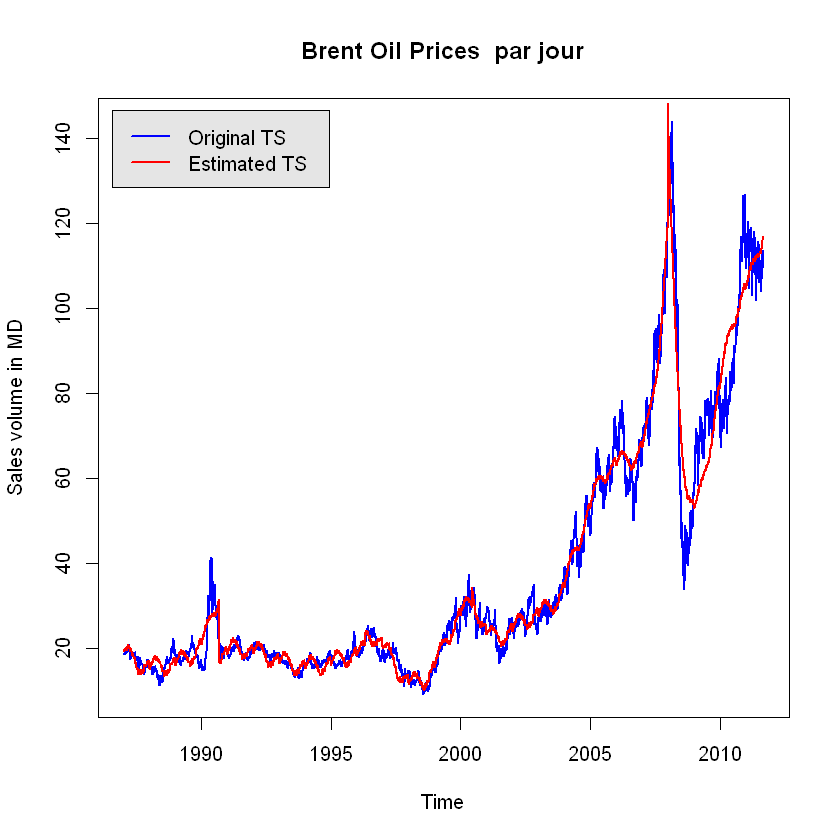

In [67]:
plot(time_series, xlab="Time", ylab="Sales volume in MD",
     main="Brent Oil Prices  par jour",
     col="blue",lwd=2)
points(time(time_series),fitted(Model15),lwd=2,type="l",col="red")
legend("topleft", c("Original TS","Estimated TS"),inset = .02,
       bg = "gray90",lwd=c(2,2),col=c("blue","red"))

In [68]:
AIC(Model9,Model10,Model11,Model12,Model13,Model14,Model15)

,df,AIC
Model9,22,67068.60
Model10,377,67474.06
Model11,383,63386.16
Model12,28,63101.81
Model13,383,63386.16
Model14,34,57514.25
Model15,395,56238.94


In [69]:
BIC(Model9,Model10,Model11,Model12,Model13,Model14,Model15)

,df,BIC
Model9,22,67224.94
Model10,377,70153.10
Model11,383,66107.83
Model12,28,63300.78
Model13,383,66107.83
Model14,34,57755.86
Model15,395,59045.89


### dou le model le plus fiable cest le model 15 qui avait un BIC et AIC les plus basses et  la plus haute Adjusted R-squared:  0.9624 

# Modélisation de la composante stochastique (résiduelle)


### Représentation graphique de la composante résiduelle

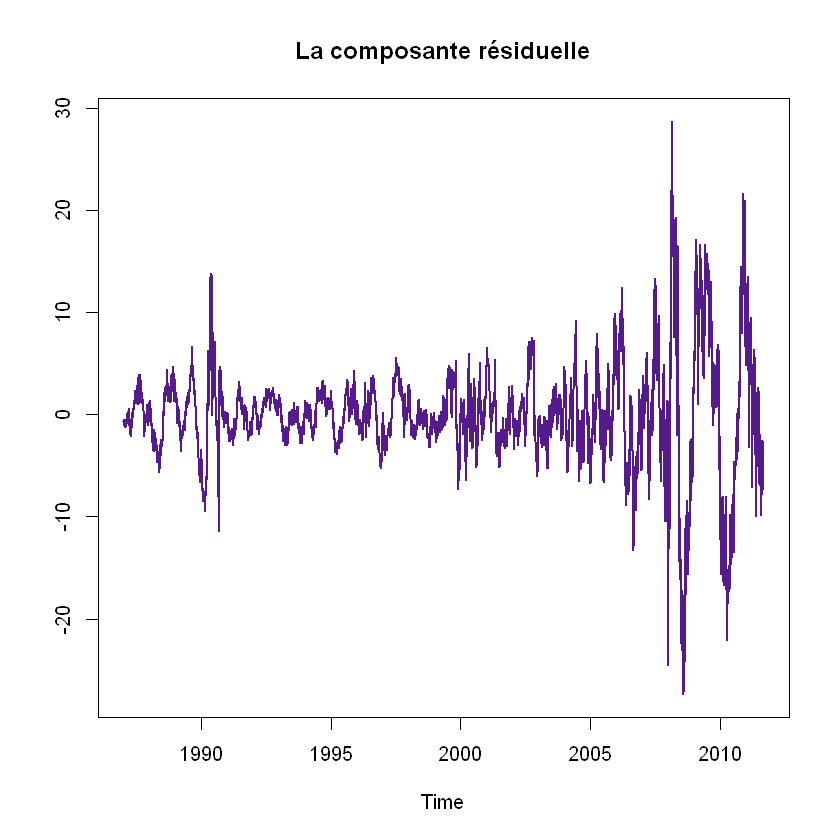

In [70]:
sp.res<-Model15$residuals
plot(time(time_series),sp.res, xlab="Time", ylab="",
     main="La composante résiduelle",
     col="purple4",lwd=2,type="l")

### La courbe est sinusoidale , donc il n'a pas de bruit Blanc

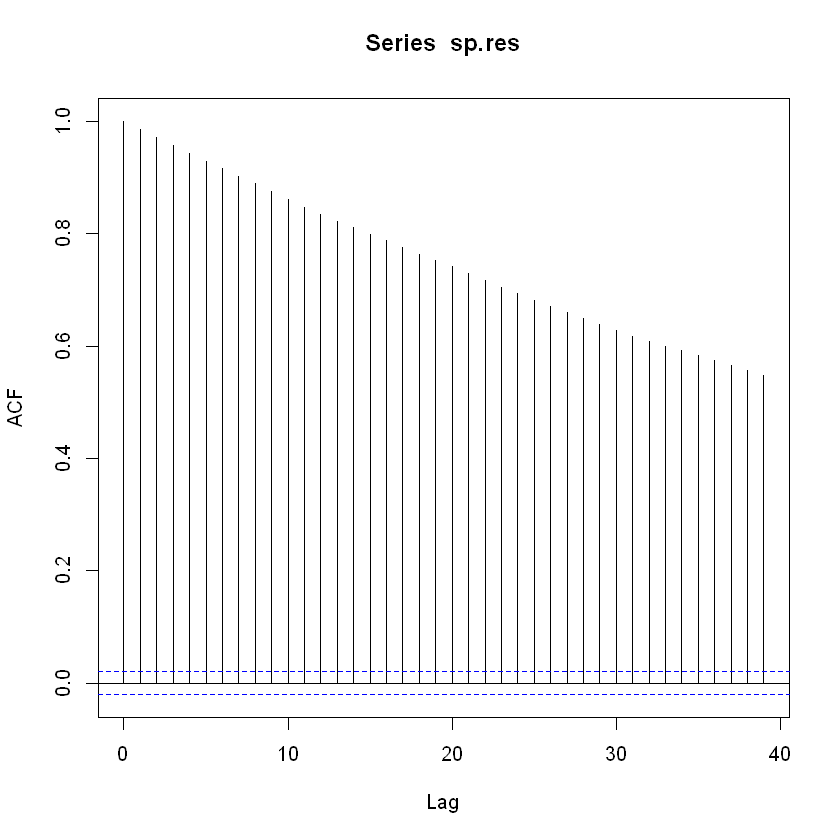

In [71]:
acf(sp.res)

### D'apres ACF ,il y'a depassement de seuil donc on a des informations donc le bruit il n'est pas blanc

## Test de stationnarité

In [150]:
library(tseries)
adf.test(sp.res)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message in adf.test(sp.res):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  sp.res
Dickey-Fuller = -7.7569, Lag order = 20, p-value = 0.01
alternative hypothesis: stationary


#### La p_value= 0.01 <0.05 => donc on accepte l’hypothèse alternative : les données sont stationnaire.

## Test de blancheur

In [151]:
Box.test(sp.res)
     


	Box-Pierce test

data:  sp.res
X-squared = 8760.7, df = 1, p-value < 2.2e-16


#### La valeurs de la p_value= p-value < 2.2e-16 <0.05 que l’hypothèse alternative est considérée : le processus stationnaire ne se comporte pas comme bruit blanc.

## Modèle ARMA pour la composante résiduelle

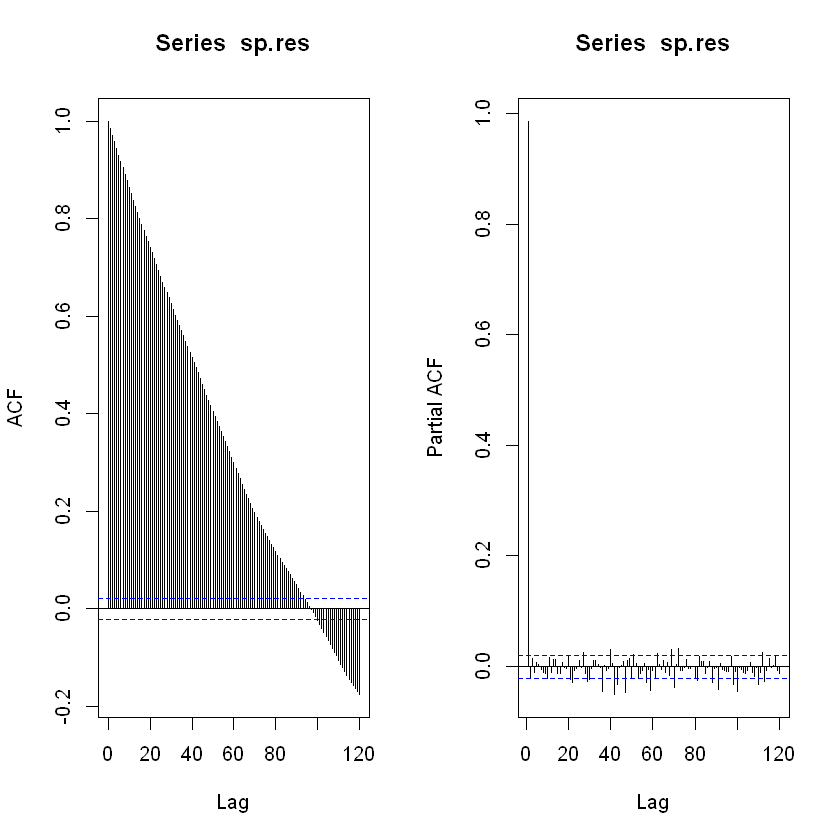

In [152]:
par(mfrow=c(1,2))
acf(sp.res,120)
pacf(sp.res,120)

#### On va utiliser la fonction auto.arima() du package forecast afin de determiner l’ordre p du modèle AR et l’ordre q de celui de MA, vu que c’est difficile de les savoir à partir de l’acf et la pacf.

In [153]:
library(forecast)
#ARIMA.d=auto.arima(d.sp.res,trace=TRUE)
ARIMA=auto.arima(sp.res,d=0,trace=TRUE)


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 23968.59
 ARIMA(0,0,0) with non-zero mean : 56282.2
 ARIMA(1,0,0) with non-zero mean : 23969
 ARIMA(0,0,1) with non-zero mean : 45725.42
 ARIMA(0,0,0) with zero mean     : 56280.2
 ARIMA(1,0,2) with non-zero mean : 23967.48
 ARIMA(0,0,2) with non-zero mean : 38964.29
 ARIMA(1,0,1) with non-zero mean : 23967.4
 ARIMA(2,0,1) with non-zero mean : 23967.13
 ARIMA(2,0,0) with non-zero mean : 23968.45
 ARIMA(3,0,1) with non-zero mean : 23970.49
 ARIMA(3,0,0) with non-zero mean : 23969.55
 ARIMA(3,0,2) with non-zero mean : Inf
 ARIMA(2,0,1) with zero mean     : 23965.71
 ARIMA(1,0,1) with zero mean     : 23965.4
 ARIMA(0,0,1) with zero mean     : 45723.42
 ARIMA(1,0,0) with zero mean     : 23967
 ARIMA(1,0,2) with zero mean     : 23965.47
 ARIMA(0,0,2) with zero mean     : 38962.29
 ARIMA(2,0,0) with zero mean     : 23966.45
 ARIMA(2,0,2) with zero mean     : Inf

 Now re-fitting the best model(s) 

In [154]:
Model.res<-arima(sp.res,order = c(1, 0, 1))

In [155]:

adf.test(Model.res$residuals)

Warning message in adf.test(Model.res$residuals):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  Model.res$residuals
Dickey-Fuller = -19.774, Lag order = 20, p-value = 0.01
alternative hypothesis: stationary


#### Puisque p_value = 0.01 < 0.05 Donc Stationnaire


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 13.98, df = 7, p-value = 0.05153

Model df: 3.   Total lags used: 10



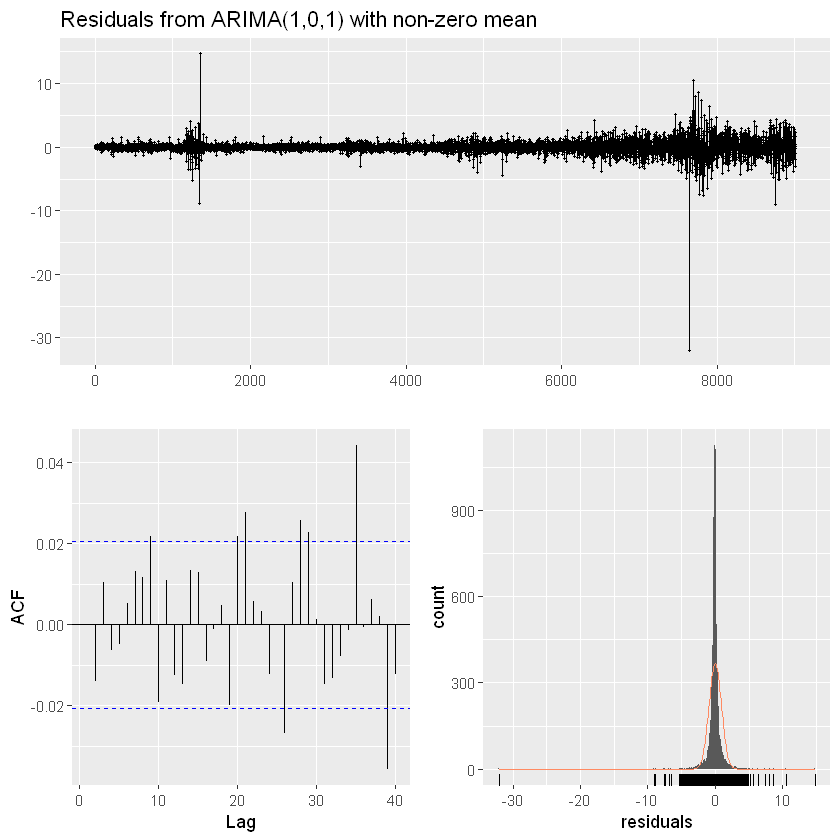

In [156]:
checkresiduals(Model.res)


Attaching package: 'aTSA'

The following object is masked from 'package:forecast':

    forecast

The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test

The following object is masked from 'package:graphics':

    identify



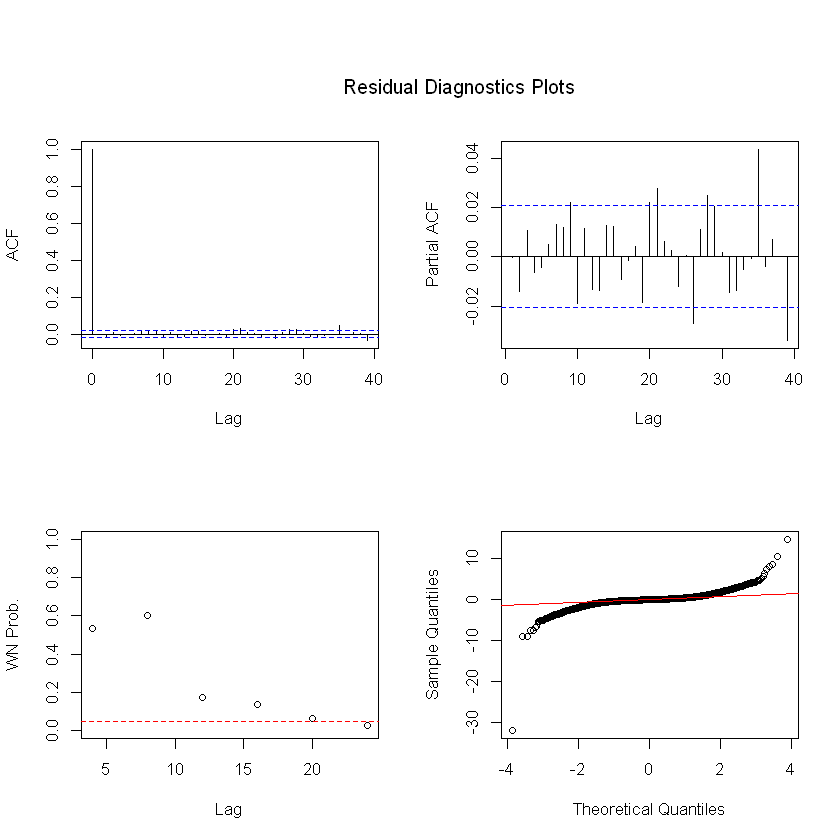

In [162]:
library(aTSA)
ts.diag(Model.res)

In [163]:
Box.test(Model.res$residuals)


	Box-Pierce test

data:  Model.res$residuals
X-squared = 0.00030071, df = 1, p-value = 0.9862


#### La valeurs de la p_value= p-value =0.9862 >0.05 que l’hypothèse alternative est considérée : le processus stationnaire se comporte  comme bruit blanc.( donc Model.res est un bon model)

Forecast for univariate time series: 
     Lead Forecast   S.E  Lower   Upper
9012    1    -4.65 0.914  -6.44 -2.8566
9013    2    -4.58 1.297  -7.12 -2.0388
9014    3    -4.51 1.582  -7.62 -1.4127
9015    4    -4.45 1.817  -8.01 -0.8869
9016    5    -4.38 2.019  -8.34 -0.4262
9017    6    -4.32 2.197  -8.63 -0.0126
9018    7    -4.26 2.358  -8.88  0.3648
9019    8    -4.19 2.504  -9.10  0.7128
9020    9    -4.13 2.638  -9.30  1.0366
9021   10    -4.07 2.762  -9.49  1.3397
9022   11    -4.01 2.877  -9.65  1.6248
9023   12    -3.95 2.984  -9.80  1.8943
9024   13    -3.90 3.085  -9.94  2.1497
9025   14    -3.84 3.180 -10.07  2.3926
9026   15    -3.78 3.270 -10.19  2.6241
9027   16    -3.73 3.354 -10.30  2.8452
9028   17    -3.67 3.435 -10.41  3.0568
9029   18    -3.62 3.511 -10.50  3.2596
9030   19    -3.57 3.583 -10.59  3.4542
9031   20    -3.52 3.652 -10.67  3.6413
9032   21    -3.46 3.718 -10.75  3.8214
9033   22    -3.41 3.780 -10.82  3.9948
9034   23    -3.36 3.840 -10.89  4.1620
90

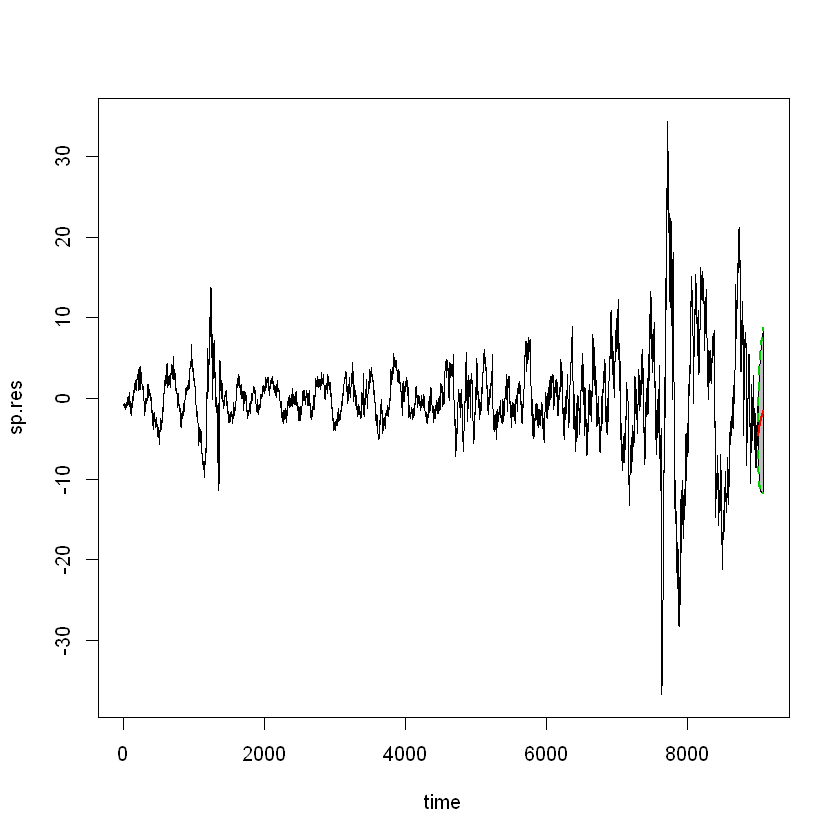

In [175]:
# Générer les prévisions
forecast_values <- forecast(Model.res,80)




#  faire juste SARIMA model

In [168]:

Model.SARIMA<-auto.arima(sp.res)
summary(Model.SARIMA)

Series: sp.res 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1     ma1
      0.9854  0.0206
s.e.  0.0018  0.0108

sigma^2 estimated as 0.8362:  log likelihood=-11981
AIC=23968   AICc=23968   BIC=23989.32

Training set error measures:
                        ME      RMSE       MAE       MPE     MAPE     MASE
Training set -0.0004343931 0.9143516 0.4759393 -7.503351 80.35992 1.004033
                      ACF1
Training set -0.0001862473



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 13.98, df = 7, p-value = 0.05153

Model df: 3.   Total lags used: 10



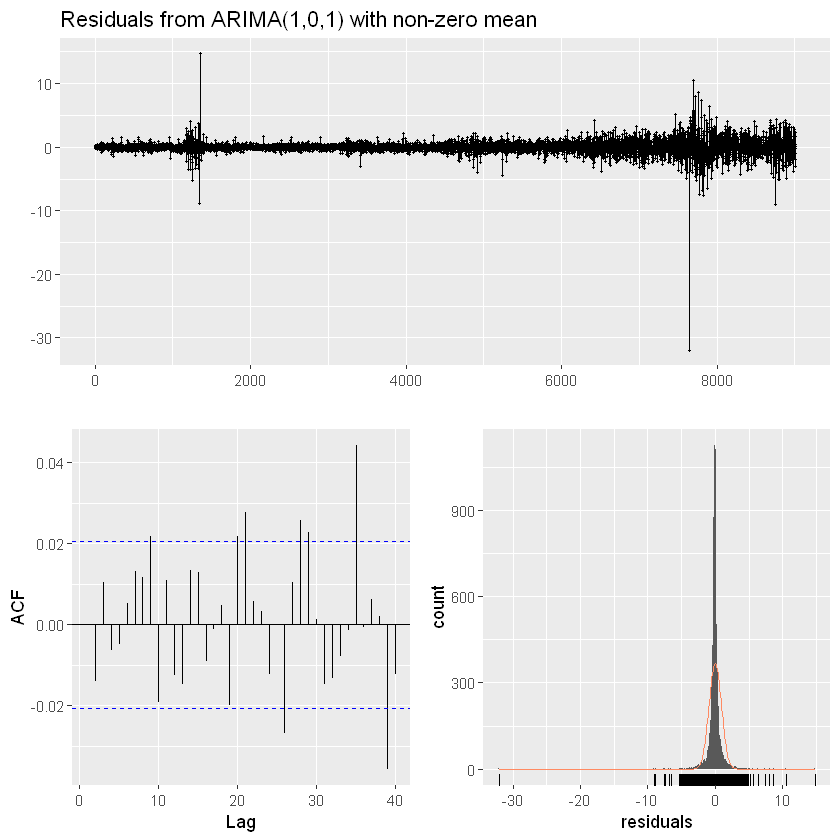

In [169]:

Model.SARIMA.fit<-arima(sp.res, order = c(1, 0, 1),seasonal = list(order = c(0,0,0), period = 365))
checkresiduals(Model.SARIMA.fit)

In [170]:

Box.test(Model.SARIMA.fit$residuals)


	Box-Pierce test

data:  Model.SARIMA.fit$residuals
X-squared = 0.00030071, df = 1, p-value = 0.9862


#### ===>le test de Box-Pierce donne un pi_value pour notre nouveau modele sarima qui est superieure  à 0.05 donc cest un  modéle parfait

Forecast for univariate time series: 
     Lead Forecast   S.E  Lower   Upper
9012    1    -4.65 0.914  -6.44 -2.8566
9013    2    -4.58 1.297  -7.12 -2.0388
9014    3    -4.51 1.582  -7.62 -1.4127
9015    4    -4.45 1.817  -8.01 -0.8869
9016    5    -4.38 2.019  -8.34 -0.4262
9017    6    -4.32 2.197  -8.63 -0.0126
9018    7    -4.26 2.358  -8.88  0.3648
9019    8    -4.19 2.504  -9.10  0.7128
9020    9    -4.13 2.638  -9.30  1.0366
9021   10    -4.07 2.762  -9.49  1.3397
9022   11    -4.01 2.877  -9.65  1.6248
9023   12    -3.95 2.984  -9.80  1.8943
9024   13    -3.90 3.085  -9.94  2.1497
9025   14    -3.84 3.180 -10.07  2.3926
9026   15    -3.78 3.270 -10.19  2.6241
9027   16    -3.73 3.354 -10.30  2.8452
9028   17    -3.67 3.435 -10.41  3.0568
9029   18    -3.62 3.511 -10.50  3.2596
9030   19    -3.57 3.583 -10.59  3.4542
9031   20    -3.52 3.652 -10.67  3.6413
9032   21    -3.46 3.718 -10.75  3.8214
9033   22    -3.41 3.780 -10.82  3.9948
9034   23    -3.36 3.840 -10.89  4.1620
90

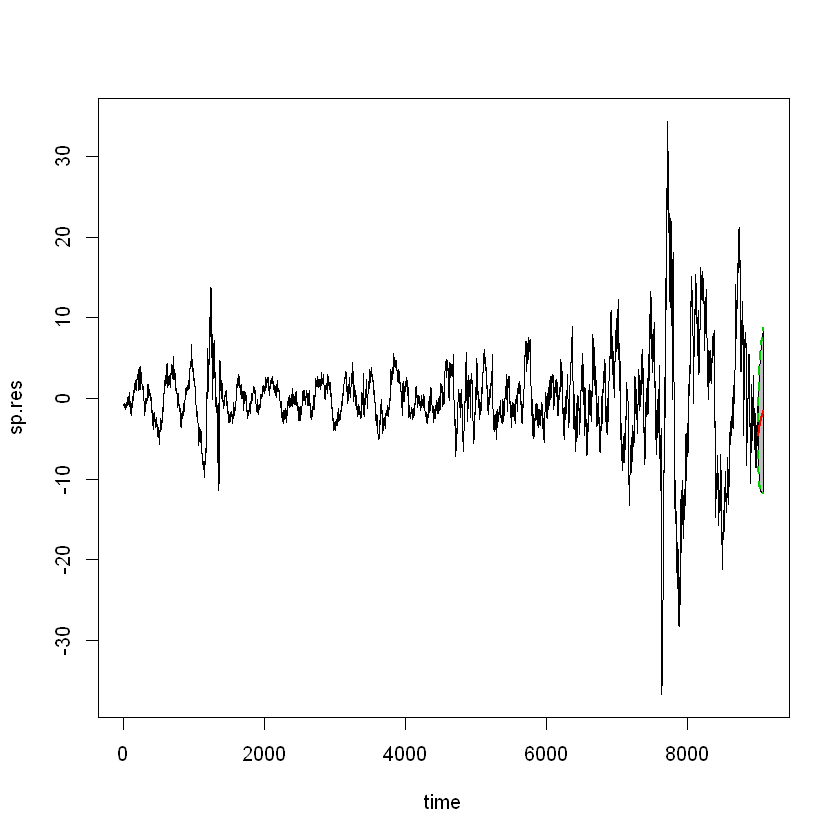

In [174]:

forecast(Model.SARIMA.fit,80)

# III Méthodologie CRISP-DM

![Golden Circle](CRISP-DM-methodology-source-5.PNG)


## 1 /Compréhension des besoins de l'entreprise :

La prévision des prix futurs du pétrole brut est essentielle pour les investisseurs, les entreprises pétrolières et les décideurs politiques afin d'anticiper les fluctuations du marché et de prendre des décisions éclairées. Ce projet vise à prédire les futurs prix du pétrole brut Brent en utilisant des données historiques couvrant la période du 17 mai 1987 au 13 novembre 2022. En exploitant les techniques avancées de data science, nous chercherons à fournir des prévisions précises. Les données proviennent de l'Administration américaine d'information sur l'énergie (EIA), qui met à jour les prix spot du Brent en Europe de manière hebdomadaire. L'analyse de ces données permettra de mieux comprendre les tendances et d'optimiser les stratégies d'investissement dans le secteur pétrolier.

## 2/ Compréhension des données :

#### Collecter les données initiales

In [176]:
# Lire les données depuis le fichier CSV
data <- read.csv("BrentOilPrices_modified.csv")
data <- subset(data, select = c("Date1", "Price1"))
# Afficher les premières lignes pour vérifier si les données sont correctement chargées
data

Date1,Price1
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,18.55
1987-05-24,18.55
1987-05-25,18.60
1987-05-26,18.63
1987-05-27,18.60
1987-05-28,18.60
1987-05-29,18.58


#### Décrire les données

In [177]:
# Afficher la structure des données
str(data)

# Résumer les statistiques de base
summary(data)


'data.frame':	9011 obs. of  2 variables:
 $ Date1 : Factor w/ 9011 levels "1987-05-20","1987-05-21",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Price1: num  18.6 18.4 18.6 18.6 18.6 ...


        Date1          Price1      
 1987-05-20:   1   Min.   :  9.10  
 1987-05-21:   1   1st Qu.: 17.83  
 1987-05-22:   1   Median : 23.23  
 1987-05-23:   1   Mean   : 37.31  
 1987-05-24:   1   3rd Qu.: 52.59  
 1987-05-25:   1   Max.   :143.95  
 (Other)   :9005                   

#### Explorer les données

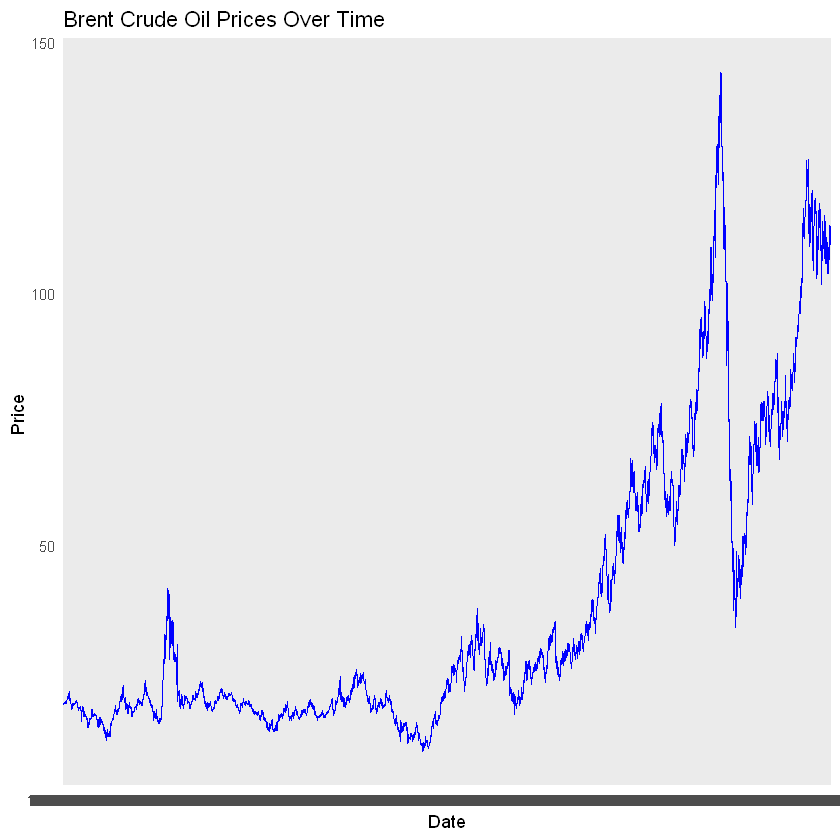

In [182]:
ggplot(data, aes(x = Date1, y = Price1)) +
  geom_line(color = "blue", group = 1) +  # Spécifiez une variable de groupement
  labs(title = "Brent Crude Oil Prices Over Time",
       x = "Date",
       y = "Price ") +
  theme_minimal()


#### Vérifier la qualité des données

Nombre de valeurs manquantes: 0 
Nombre de lignes dupliquées: 0 


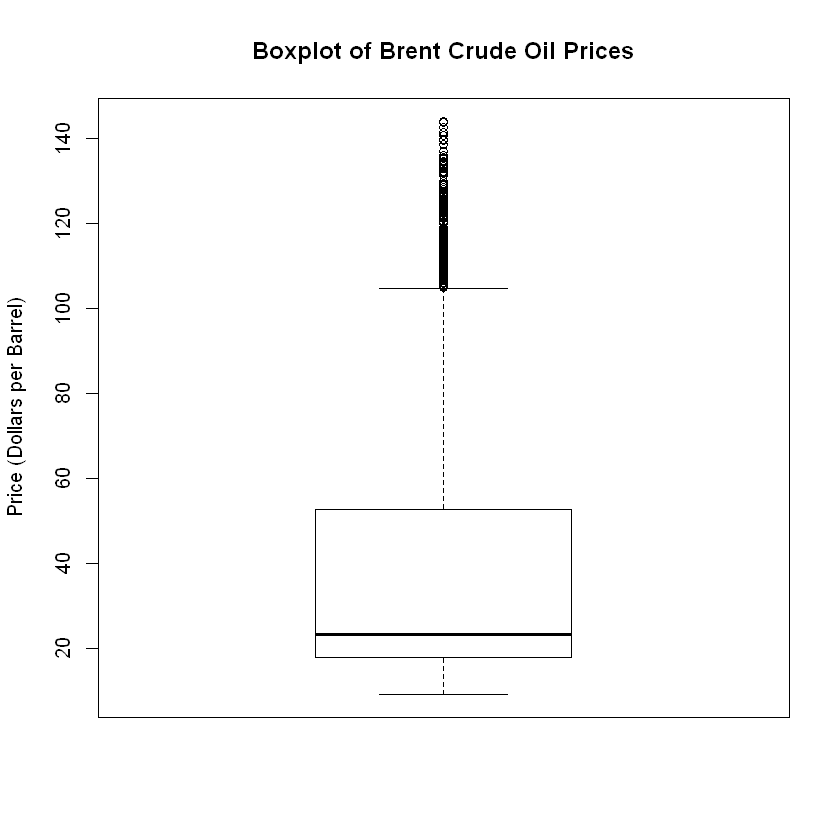

In [188]:
# Vérifier les valeurs manquantes
missing_values <- sum(is.na(data))
cat("Nombre de valeurs manquantes:", missing_values, "\n")

# Vérifier les doublons
duplicate_rows <- sum(duplicated(data))
cat("Nombre de lignes dupliquées:", duplicate_rows, "\n")

# Identifier et traiter les valeurs aberrantes
# Par exemple, afficher les prix anormalement élevés ou bas
boxplot(data$Price1, main = "Boxplot of Brent Crude Oil Prices",
        ylab = "Price (Dollars per Barrel)")




## 3/Préparation des données

Au début de la phase de préparation des données, nous avons constaté que l'ensemble de données initial n'était pas complet. Certaines dates manquaient, ce qui pose un problème important pour l'analyse des séries temporelles, car la continuité des dates est essentielle. Par exemple, les dates du 23 et 24 mai 1987 étaient absentes, ce qui pourrait entraîner des biais dans les résultats de notre modélisation.

Pour remédier à ce problème, nous avons d'abord ajouté les dates manquantes dans l'ensemble de données, en insérant des valeurs NA pour les prix correspondants. Ensuite, nous avons imputé ces valeurs manquantes en utilisant la dernière valeur non nulle disponible pour le prix. Cette méthode d'imputation, connue sous le nom de "forward fill" (remplissage vers l'avant), permet de maintenir la continuité des séries temporelles, garantissant ainsi une analyse plus précise et fiable.

## 4/Modélisation

Au début de la phase de modélisation, nous avons commencé par créer des modèles linéaires simples pour capturer la tendance des prix du pétrole. Cependant, ces modèles initiaux ne fournissaient pas une précision suffisante.

Pour améliorer notre modèle, nous avons introduit des termes de saisonnalité en utilisant les fonctions cosinus et sinus, tout en passant à une tendance quadratique. Malgré ces améliorations, le modèle ne donnait toujours pas de résultats satisfaisants.

Nous avons alors identifié la présence de points de rupture (breakpoints) dans les données, indiquant des changements soudains dans la tendance des prix. En intégrant ces points de rupture, nous avons finalement développé un modèle efficace. Ce modèle inclut une tendance de degré 4, des termes de saisonnalité (cos et sin), et 5 breakpoints.

Cette approche nous a permis de capturer plus fidèlement la dynamique complexe des prix du pétrole et d'estimer un modèle performant.

En plus de ces améliorations, nous avons capturé la partie stochastique (les résidus) en utilisant des modèles ARIMA et SARIMA, permettant ainsi de modéliser les composantes aléatoires des variations des prix.

Cette approche nous a permis de capturer plus fidèlement la dynamique complexe des prix du pétrole et d'estimer un modèle performant.

## 5/Evaluation

Dans cette section, nous évaluons les modèles en utilisant plusieurs métriques et techniques. Tout d'abord, nous utilisons le coefficient de détermination ajusté (R² ajusté) pour évaluer la capacité des modèles à expliquer la variation des données tout en pénalisant le nombre de paramètres du modèle. Un R² ajusté plus élevé indique un meilleur ajustement du modèle aux données.

Ensuite, nous utilisons les critères d'information bayésiens (BIC) et d'information d'Akaike (AIC) pour comparer la performance des différents modèles. Ces critères prennent en compte à la fois la qualité de l'ajustement du modèle et sa complexité, favorisant ainsi les modèles qui offrent un bon équilibre entre précision et parcimonie.

En plus des mesures quantitatives, nous évaluons également visuellement les modèles estimés par rapport à la série originale. Les graphiques de séries temporelles et les prédictions des modèles nous aident à identifier les tendances, les saisons et les comportements anormaux.

Enfin, nous avons testé la qualité des modèles en examinant les résidus pour déterminer s'ils ressemblent à un bruit blanc. Un bruit blanc dans les résidus suggère que le modèle capture efficacement la structure de la série temporelle, tandis que des motifs résiduels indiquent des erreurs systématiques dans le modèle.

En intégrant ces différentes méthodes d'évaluation, nous sommes en mesure de déterminer la performance et la robustesse des modèles utilisés dans notre analyse.









# IV: Cercle d'Or pour le projet de modélisation des séries temporelles des prix du pétrole brutt

#### Pourquoi (Why)
L'objectif de ce projet est de prédire les prix futurs du pétrole brut Brent en utilisant des modèles de séries temporelles. Anticiper les mouvements des prix du pétrole est essentiel pour les décisions économiques et stratégiques. Les entreprises, les gouvernements et les investisseurs s'appuient sur ces prévisions pour gérer les risques, optimiser les investissements et planifier les budgets.

#### Comment (How)
Nous atteignons cet objectif en utilisant des techniques avancées de modélisation des séries temporelles. Nos méthodes incluent l'utilisation de modèles comme ARIMA et SARIMA pour analyser les données historiques des prix du pétrole. Nous évaluons la performance de nos modèles à l'aide de mesures statistiques telles que le R² ajusté, le BIC et l'AIC. De plus, nous testons les résidus pour vérifier qu'ils ressemblent à un bruit blanc, assurant ainsi que nos modèles sont robustes et précis. Ces techniques nous distinguent et garantissent la fiabilité de nos prévisions.

#### Quoi (What)
Nous analysons et prévoyons les prix du pétrole brut Brent à partir des données historiques allant du 17 mai 1987 au 2012-01-19. Nous fournissons des prévisions détaillées et visuelles des prix futurs, ainsi qu'une analyse des tendances et des facteurs influençant ces prix. Nos résultats sont conçus pour aider nos clients à naviguer les marchés volatils avec confiance, en prenant des décisions informées basées sur des données solides et des analyses rigoureuses.









![Golden Circle](thumbnail_image.png)
